# import packages

In [120]:
import matplotlib.pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd')
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')
jtplot.style(ticks=True, grid=False, figsize=(6.5, 5))

import pandas as pd
import numpy as np

# load data

In [121]:
train_xy = pd.read_csv("train_xy.csv",index_col=["cust_group","cust_id"])
train_xy = train_xy.replace(-99,np.nan)

# view the label variable's distribution

------count of total y------
 0    14309
1      691
Name: y, dtype: int64
------group count of y------
 cust_group  y
group_1     0    4544
            1     456
group_2     0    4871
            1     129
group_3     0    4894
            1     106
Name: y, dtype: int64


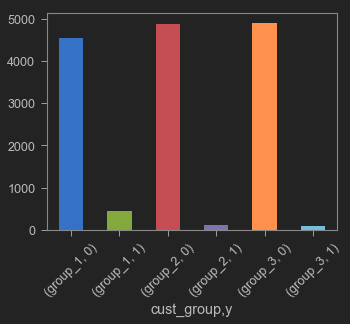

In [122]:
y = train_xy.y
print("------count of total y------\n",y.value_counts())
y_group = y.groupby("cust_group").value_counts()
print("------group count of y------\n",y_group)
y_group.plot(kind="bar",rot=45)

# remove unnecessary variables or observations

## compute the missing rate
### col missing rate

In [123]:
col_missing_rate =train_xy.apply(lambda x:(len(x)-x.count())/len(x))
col_missing_rate.name="col_missing_rate"
col_missing_rate09 = col_missing_rate[col_missing_rate>0.8]
col_missing_rate09

x_92     0.998600
x_94     0.998600
x_102    0.999933
x_103    0.999733
x_104    0.999267
x_105    0.998067
x_106    0.999267
x_107    0.999867
x_108    0.999667
x_109    0.999733
x_110    1.000000
x_111    0.999667
x_112    1.000000
x_113    0.999933
x_114    0.999933
x_115    0.999800
x_116    1.000000
x_117    0.999733
x_118    0.999933
x_119    0.999800
x_120    0.999133
x_121    0.998467
x_122    0.998667
x_123    0.999867
x_124    0.999333
x_125    0.999867
x_126    0.999933
x_127    0.999733
x_128    0.999800
x_129    1.000000
x_130    0.999800
x_131    0.999933
x_132    1.000000
x_133    0.999933
x_134    1.000000
x_135    0.999933
x_136    0.999533
x_137    0.999933
x_138    0.999933
Name: col_missing_rate, dtype: float64

### plot_numeric_col_missing_rate

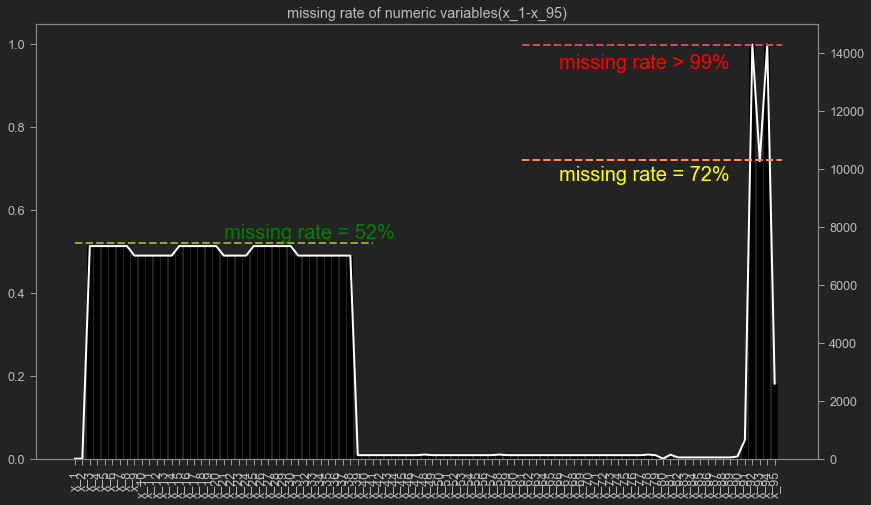

In [124]:
numeric_col_missing_rate = col_missing_rate.loc["x_1":"x_95"]

figure,ax = plt.subplots(figsize=(14,8))
ax.bar(numeric_col_missing_rate.index,numeric_col_missing_rate,color="black")

ax.plot(numeric_col_missing_rate,color="white",linewidth=2)

ax.plot((0.0,40),(0.52,0.52),"g--",linewidth=2)
ax.annotate("missing rate = 52%",xy=(20,0.51),xytext=(20,0.53),color="green",fontsize=20)

ax.plot((60,95),(0.72,0.72),"y--",linewidth=2)
ax.annotate("missing rate = 72%",xy=(70,0.7),xytext=(65,0.67),color="yellow",fontsize=20)

ax.plot((60,95),(0.998,0.998),"r--",linewidth=2)
ax.annotate("missing rate > 99%",xy=(70,0.9),xytext=(65,0.94),color="red",fontsize=20)

ax.set_title("missing rate of numeric variables(x_1-x_95)")
ax_ = ax.twinx()
ax_.set_ylim(0,15000)
for xlabel in ax.get_xticklabels():
    xlabel.set_rotation(90)

### plot_category_col_missing_rate

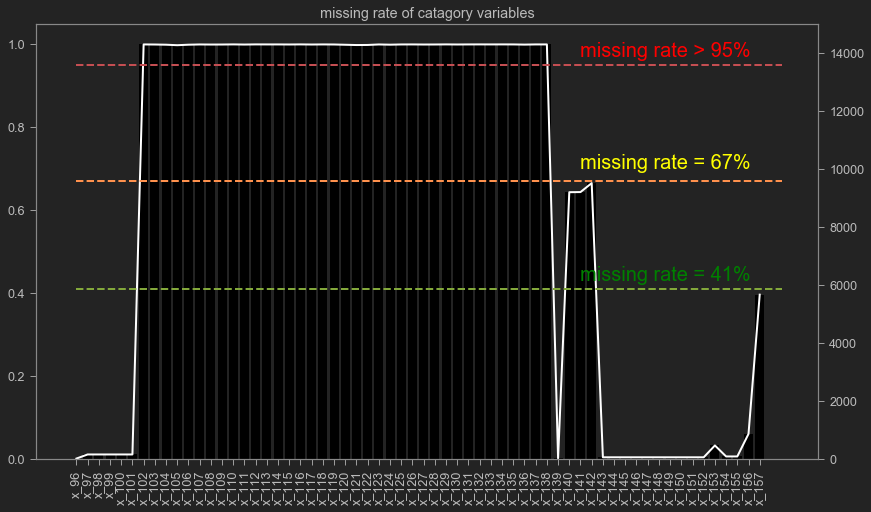

In [125]:
category_col_missing_rate = col_missing_rate.loc["x_96":"x_157"]

figure,ax = plt.subplots(figsize=(14,8))
ax.bar(category_col_missing_rate.index,category_col_missing_rate,color="black")

ax.plot(category_col_missing_rate,color="white",linewidth=2)

ax.plot((0.0,63),(0.95,0.95),"r--",linewidth=2)
ax.annotate(s="missing rate > 95%",xy=(45,0.95),xytext=(45,0.97),color="red",fontsize=20)

ax.plot((0.0,63),(0.67,0.67),"y--",linewidth=2)
ax.annotate("missing rate = 67%",xy=(45,0.68),xytext=(45,0.7),color="yellow",fontsize=20)

ax.plot((0.0,63),(0.41,0.41),"g--",linewidth=2)
ax.annotate("missing rate = 41%",xy=(45,0.42),xytext=(45,0.43),color="green",fontsize=20)

ax.set_title("missing rate of catagory variables")
ax_ = ax.twinx()
ax_.set_ylim(0,15000)
for xlabel in ax.get_xticklabels():
    xlabel.set_rotation(90)

In [126]:
train_xy.drop(col_missing_rate09.index,axis=1,inplace=True)

### row missing rate

In [127]:
row_missing_rate = pd.Series(train_xy.T.apply(lambda x: (len(x)-x.count())/len(x)),name="row_missing_rate")
row_missing_with_y = pd.concat([row_missing_rate,train_xy.y],axis=1)
row_drop = row_missing_with_y[row_missing_with_y.row_missing_rate>0.7]
print(row_drop.y.value_counts()) #用户信息缺失可能与风险关系不大
row_drop

0    79
1     2
Name: y, dtype: int64


row_missing_rate  y
cust_group cust_id                     
group_3    110061           0.722689  0
           110103           0.705882  0
           110124           0.739496  0
           110164           0.722689  0
           110208           0.714286  0
           110296           0.722689  0
           110477           0.722689  0
           110603           0.722689  0
           110636           0.705882  0
           110655           0.722689  0
           110824           0.722689  0
           110834           0.731092  0
           110985           0.722689  0
           111009           0.705882  0
           111017           0.722689  0
           111030           0.722689  0
           111096           0.714286  0
           111202           0.739496  0
           111273           0.731092  0
           111354           0.705882  0
           111425           0.714286  0
           111437           0.747899  0
           111553           0.722689  0
           111581           0.722689  0
           111625           0.714286  0
           111733           0.714286  0
           111744           0.714286  0
           111846           0.714286  0
           111931           0.722689  0
           111958           0.714286  0
...                              ... ..
           113393           0.714286  0
           113471           0.731092  0
           113488           0.714286  0
           113574           0.714286  0
           113589           0.714286  0
           113598           0.731092  0
           113602           0.731092  0
           113677           0.705882  0
           113737           0.722689  0
           113776           0.722689  0
           113803           0.764706  0
           113848           0.705882  0
           113851           0.722689  0
           113912           0.722689  0
           114002           0.747899  0
           114204           0.756303  0
           114227           0.731092  0
           114267           0.731092  0
           114298           0.722689  0
           114321           0.714286  0
           114329           0.739496  0
           114440           0.731092  0
           114507           0.731092  0
           114528           0.714286  0
           114534           0.705882  0
           114615           0.756303  0
           114637           0.731092  0
           114639           0.722689  0
           114916           0.731092  1
           114971           0.731092  1

[81 rows x 2 columns]

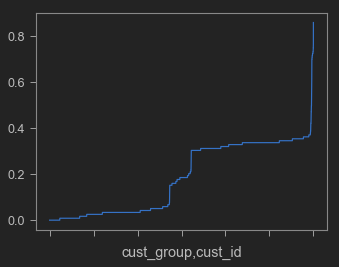

In [128]:
row_missing_rate.sort_values().plot()

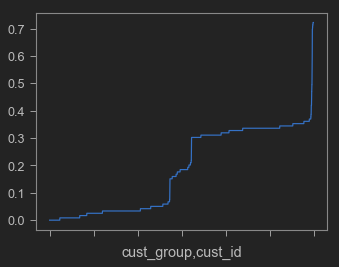

In [129]:
row_missing_rate[row_missing_rate<=0.73].sort_values().plot()

In [130]:
train_xy.drop(index=row_drop.index,axis=0,inplace=True)

## view the distribution
### numeric var--discretize

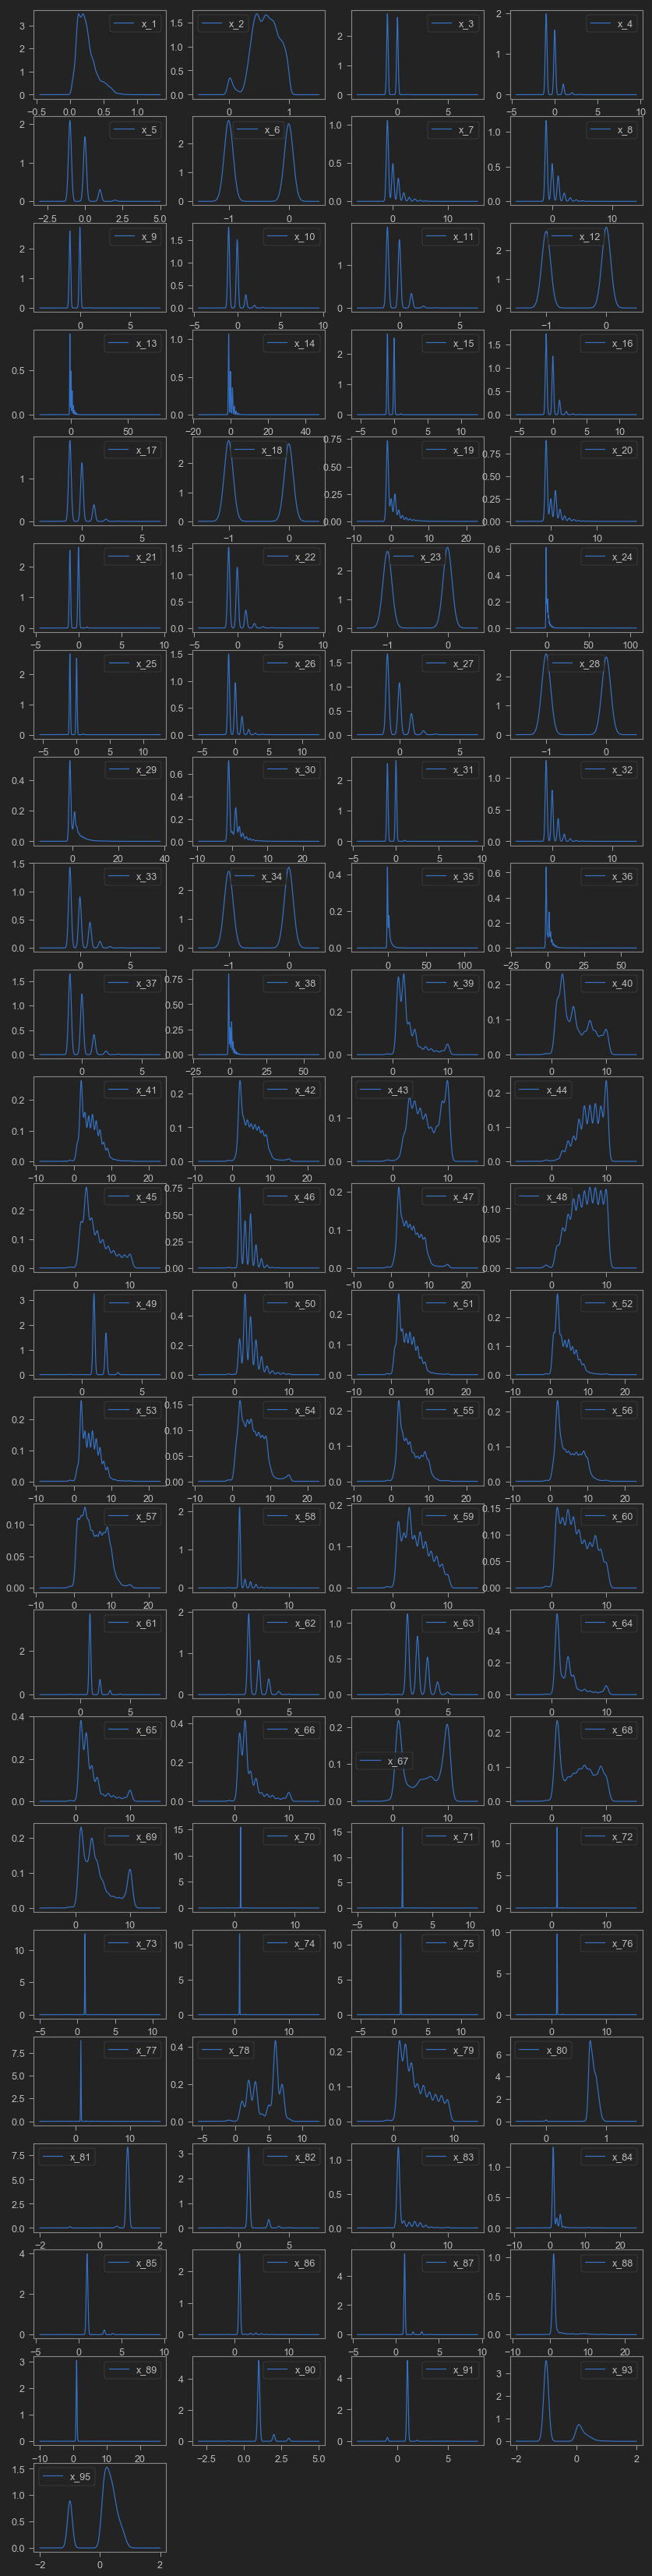

In [131]:
numeric_var = train_xy.loc[:,"x_1":"x_95"].fillna(-1)

ncol = 4
nrow = (len(numeric_var.columns) // ncol)+1
figure = plt.figure(figsize=(14,60))
for i in range(len(numeric_var.columns)):
    ax = plt.subplot(nrow,ncol,i+1)
    numeric_var.iloc[:,i].plot(kind="kde",ax=ax)
    ax.set_ylabel("")
    ax.legend([str(numeric_var.columns[i])],loc="best")
plt.savefig("./plots/train_data.png")

In [132]:
def discrete_detect(col_list):
    for col in col_list:
        val_count = numeric_var[col].value_counts()
        print(val_count)
        fig,axes = plt.subplots(1,2,figsize=(8,4))
        val_count.plot(kind="bar",ax=axes[0])
        axes[1].scatter(numeric_var[col],train_xy.y)
        plt.title(col)
        plt.show()

-1.0    7608
 0.0    7271
 1.0      35
 2.0       4
 5.0       1
Name: x_3, dtype: int64


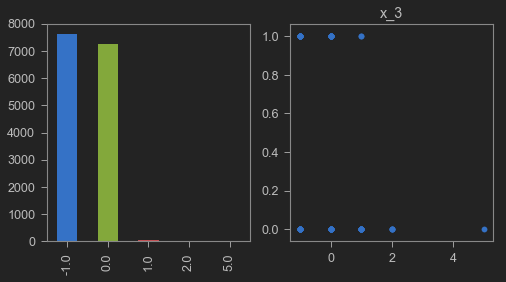

-1.0    7608
 0.0    6076
 1.0    1001
 2.0     199
 3.0      33
 5.0       1
 6.0       1
Name: x_4, dtype: int64


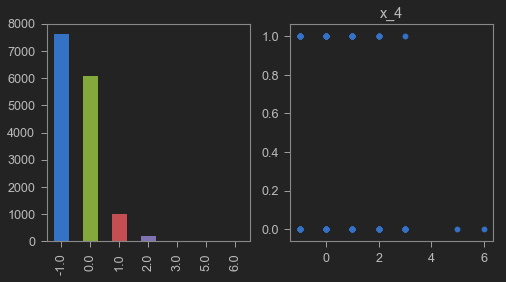

-1.0    7608
 0.0    6076
 1.0    1110
 2.0     122
 3.0       3
Name: x_5, dtype: int64


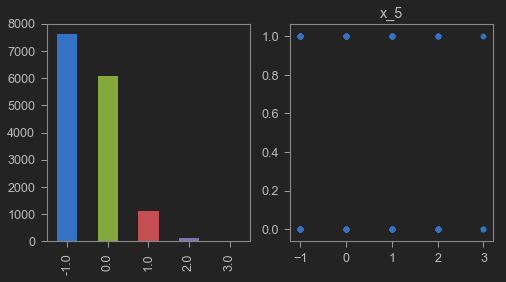

-1.0    7608
 0.0    7311
Name: x_6, dtype: int64


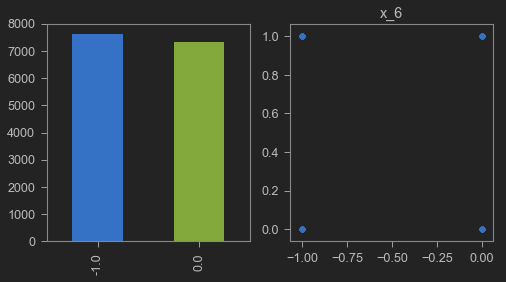

-1.0     7608
 0.0     3545
 1.0     2166
 2.0      810
 3.0      380
 4.0      230
 5.0      105
 6.0       50
 7.0       17
 9.0        5
 8.0        2
 10.0       1
Name: x_7, dtype: int64


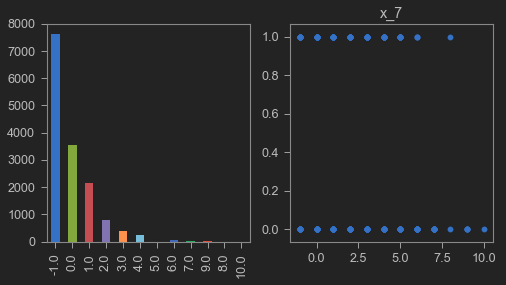

-1.0    7608
 0.0    3545
 1.0    2400
 2.0     782
 3.0     340
 4.0     157
 5.0      57
 6.0      20
 7.0       6
 9.0       2
 8.0       2
Name: x_8, dtype: int64


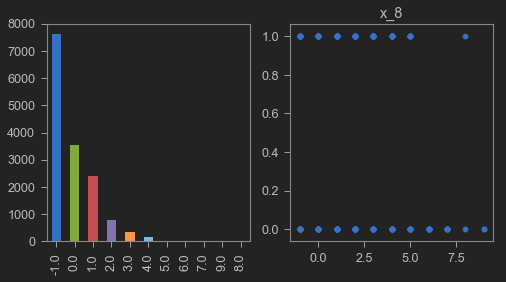

 0.0    7613
-1.0    7264
 1.0      35
 2.0       5
 3.0       1
 5.0       1
Name: x_9, dtype: int64


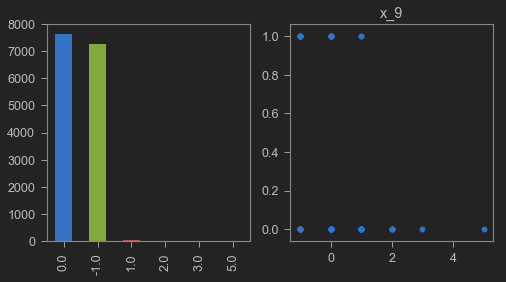

-1.0    7264
 0.0    6141
 1.0    1198
 2.0     249
 3.0      58
 4.0       5
 5.0       3
 6.0       1
Name: x_10, dtype: int64


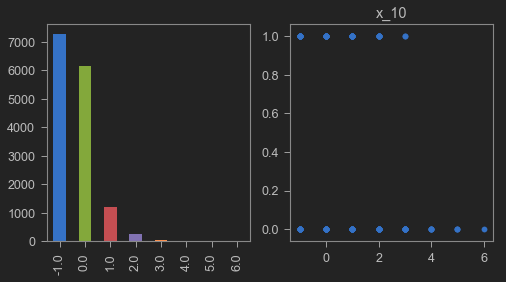

-1.0    7264
 0.0    6141
 1.0    1306
 2.0     180
 3.0      26
 4.0       2
Name: x_11, dtype: int64


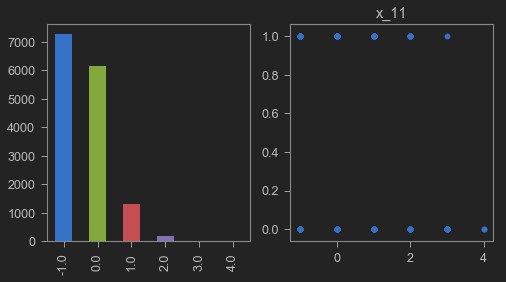

 0.0    7655
-1.0    7264
Name: x_12, dtype: int64


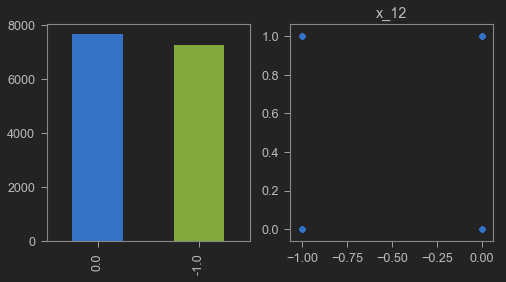

-1.0     7264
 0.0     3900
 1.0     2172
 2.0      804
 3.0      393
 4.0      207
 5.0       89
 6.0       45
 7.0       16
 9.0       10
 8.0        6
 11.0       4
 10.0       2
 15.0       2
 52.0       1
 12.0       1
 38.0       1
 13.0       1
 19.0       1
Name: x_13, dtype: int64


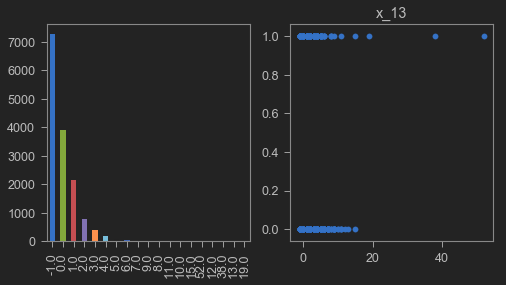

-1.0     7264
 0.0     3900
 1.0     2418
 2.0      782
 3.0      329
 4.0      136
 5.0       51
 6.0       14
 7.0       12
 9.0        5
 11.0       2
 8.0        2
 31.0       1
 22.0       1
 14.0       1
 10.0       1
Name: x_14, dtype: int64


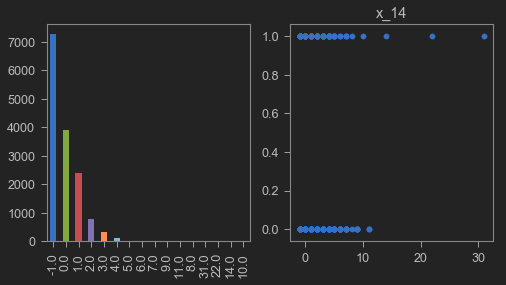

-1.0    7608
 0.0    7207
 1.0      95
 2.0       5
 3.0       2
 4.0       1
 8.0       1
Name: x_15, dtype: int64


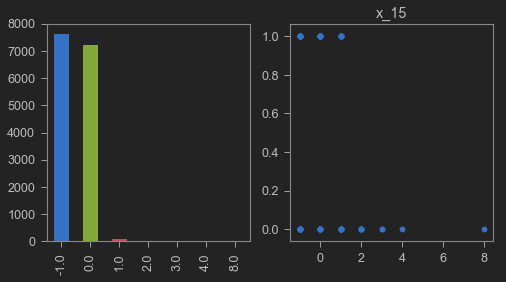

-1.0    7608
 0.0    5519
 1.0    1376
 2.0     304
 3.0      82
 4.0      27
 5.0       1
 8.0       1
 6.0       1
Name: x_16, dtype: int64


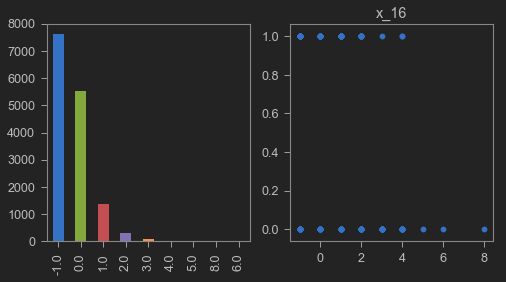

-1.0    7608
 0.0    5519
 1.0    1564
 2.0     201
 3.0      26
 4.0       1
Name: x_17, dtype: int64


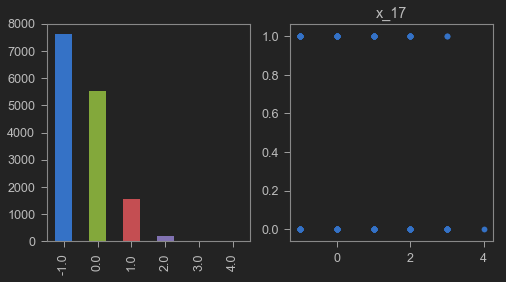

-1.0    7608
 0.0    7311
Name: x_18, dtype: int64


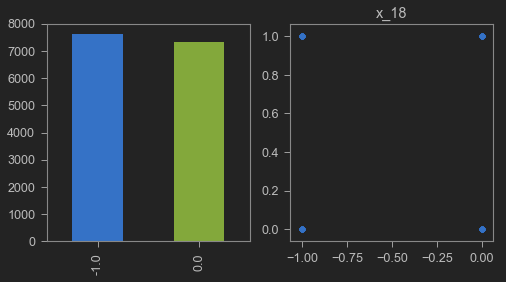

-1.0     7608
 1.0     2576
 0.0     2116
 2.0     1071
 3.0      555
 4.0      351
 5.0      237
 6.0      165
 7.0      106
 8.0       59
 9.0       29
 10.0      15
 11.0      13
 12.0       8
 13.0       5
 15.0       3
 14.0       2
Name: x_19, dtype: int64


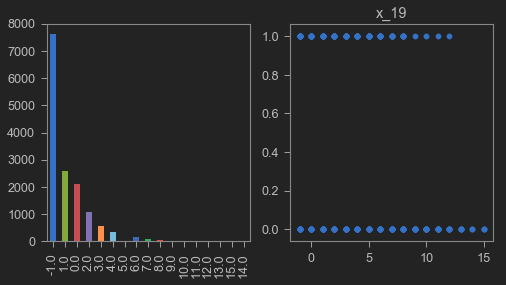

-1.0     7608
 1.0     2910
 0.0     2116
 2.0     1134
 3.0      516
 4.0      303
 5.0      175
 6.0       82
 7.0       36
 8.0       28
 10.0       5
 9.0        4
 12.0       2
Name: x_20, dtype: int64


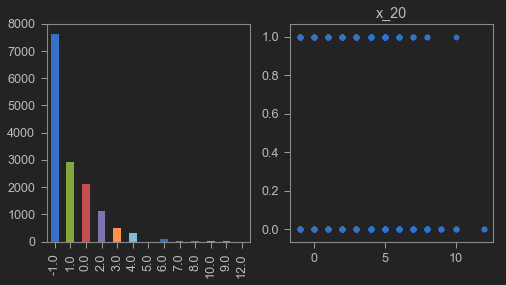

 0.0    7542
-1.0    7264
 1.0     102
 2.0       6
 4.0       2
 6.0       1
 3.0       1
 5.0       1
Name: x_21, dtype: int64


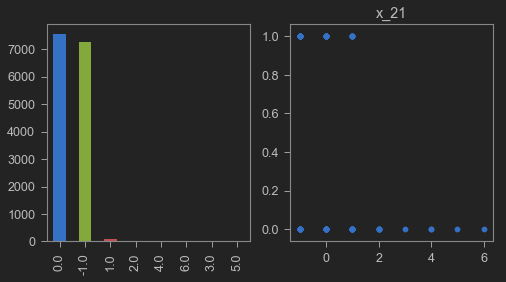

-1.0    7264
 0.0    5459
 1.0    1613
 2.0     409
 3.0     124
 4.0      36
 5.0      11
 6.0       3
Name: x_22, dtype: int64


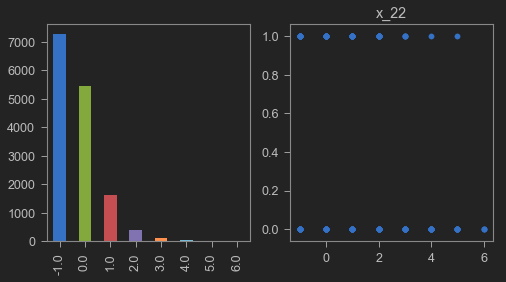

 0.0    7655
-1.0    7264
Name: x_23, dtype: int64


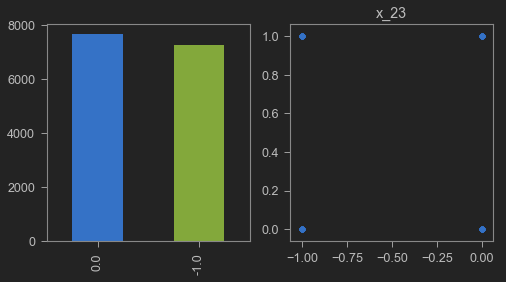

-1.0     7264
 1.0     2608
 0.0     2415
 2.0     1086
 3.0      550
 4.0      355
 5.0      227
 6.0      157
 7.0      104
 8.0       51
 9.0       30
 11.0      13
 10.0      13
 12.0      12
 13.0       7
 15.0       5
 14.0       4
 16.0       4
 18.0       4
 27.0       2
 20.0       2
 21.0       2
 32.0       1
 65.0       1
 31.0       1
 71.0       1
Name: x_24, dtype: int64


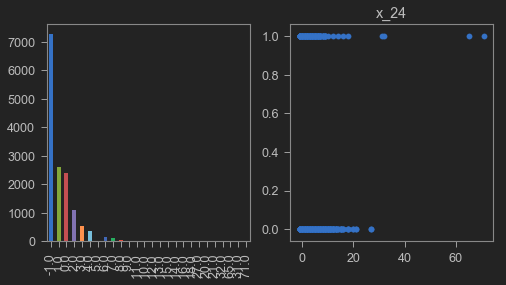

-1.0    7608
 0.0    7207
 1.0      95
 2.0       5
 3.0       2
 4.0       1
 8.0       1
Name: x_25, dtype: int64


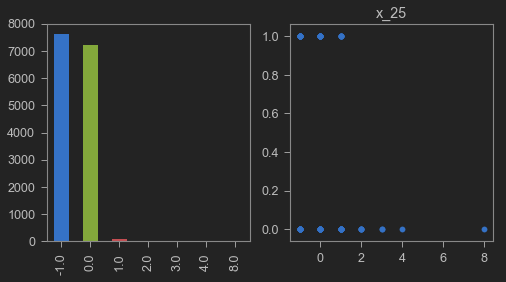

-1.0    7608
 0.0    4889
 1.0    1725
 2.0     489
 3.0     143
 4.0      50
 5.0       9
 6.0       4
 7.0       1
 8.0       1
Name: x_26, dtype: int64


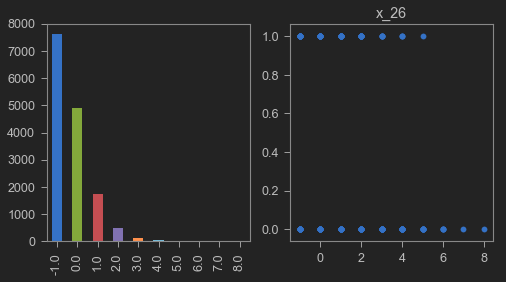

-1.0    7608
 0.0    4889
 1.0    1991
 2.0     372
 3.0      57
 4.0       2
Name: x_27, dtype: int64


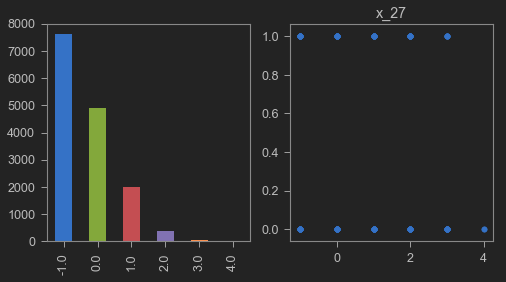

-1.0    7608
 0.0    7311
Name: x_28, dtype: int64


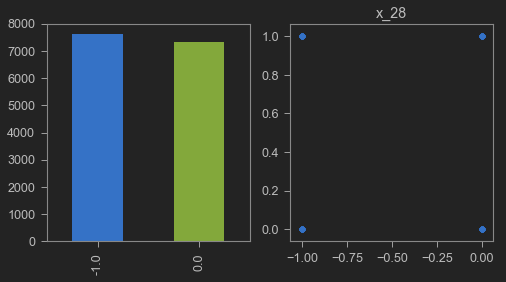

-1.0     7608
 1.0     2720
 2.0     1279
 0.0      895
 3.0      705
 4.0      469
 5.0      371
 6.0      246
 7.0      165
 8.0      127
 9.0       87
 10.0      54
 11.0      51
 12.0      35
 14.0      28
 13.0      26
 15.0      19
 16.0      15
 17.0       6
 18.0       6
 19.0       3
 22.0       1
 24.0       1
 20.0       1
 25.0       1
Name: x_29, dtype: int64


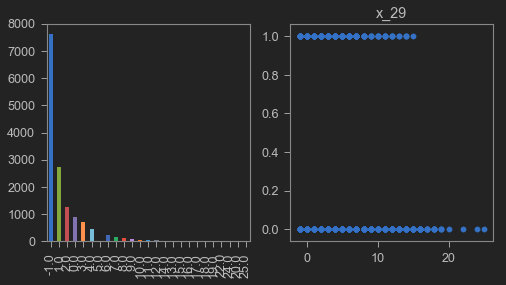

-1.0     7608
 1.0     3166
 2.0     1397
 0.0      895
 3.0      771
 4.0      430
 5.0      265
 6.0      169
 7.0       85
 8.0       56
 9.0       33
 10.0      21
 12.0       9
 11.0       9
 13.0       2
 16.0       1
 14.0       1
 15.0       1
Name: x_30, dtype: int64


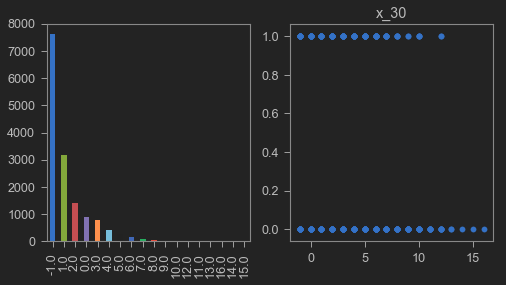

 0.0    7542
-1.0    7264
 1.0     102
 2.0       6
 4.0       2
 6.0       1
 3.0       1
 5.0       1
Name: x_31, dtype: int64


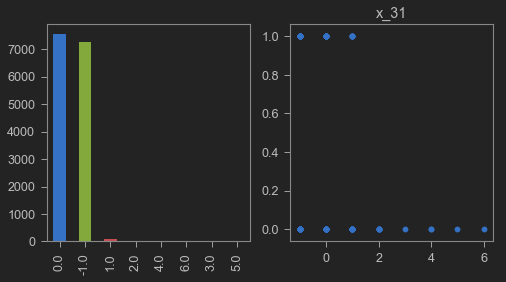

-1.0    7264
 0.0    4596
 1.0    2046
 2.0     655
 3.0     239
 4.0      72
 5.0      33
 6.0      12
 9.0       1
 8.0       1
Name: x_32, dtype: int64


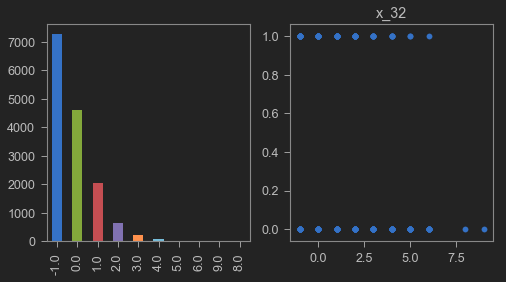

-1.0    7264
 0.0    4596
 1.0    2307
 2.0     592
 3.0     135
 4.0      23
 5.0       2
Name: x_33, dtype: int64


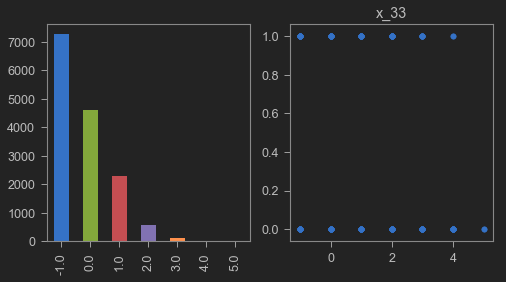

 0.0    7655
-1.0    7264
Name: x_34, dtype: int64


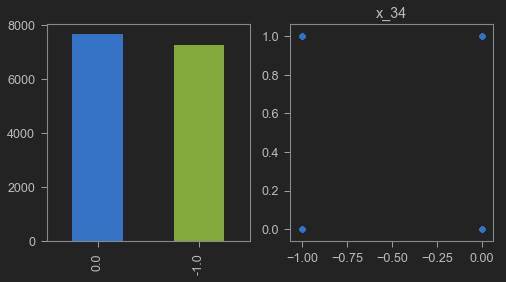

-1.0     7264
 1.0     2766
 2.0     1287
 0.0     1205
 3.0      679
 4.0      478
 5.0      347
 6.0      249
 7.0      162
 8.0      116
 9.0       88
 10.0      63
 11.0      46
 13.0      31
 12.0      31
 14.0      22
 16.0      17
 15.0      16
 17.0      10
 18.0       9
 19.0       8
 27.0       3
 25.0       3
 21.0       2
 22.0       2
 24.0       2
 78.0       1
 28.0       1
 32.0       1
 20.0       1
 64.0       1
 46.0       1
 50.0       1
 35.0       1
 65.0       1
 44.0       1
 26.0       1
 59.0       1
 33.0       1
Name: x_35, dtype: int64


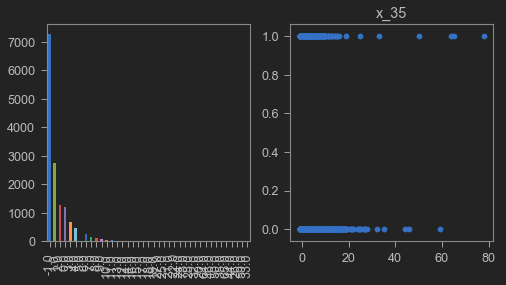

-1.0     7264
 1.0     3224
 2.0     1427
 0.0     1205
 3.0      744
 4.0      407
 5.0      256
 6.0      173
 7.0       70
 8.0       48
 9.0       31
 10.0      22
 11.0      15
 12.0       8
 14.0       5
 13.0       4
 15.0       3
 22.0       2
 24.0       2
 17.0       2
 18.0       2
 28.0       1
 40.0       1
 33.0       1
 34.0       1
 19.0       1
Name: x_36, dtype: int64


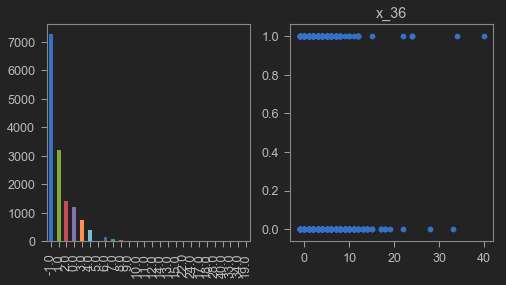

-1.0    7264
 0.0    5459
 1.0    1802
 2.0     329
 3.0      53
 4.0      12
Name: x_37, dtype: int64


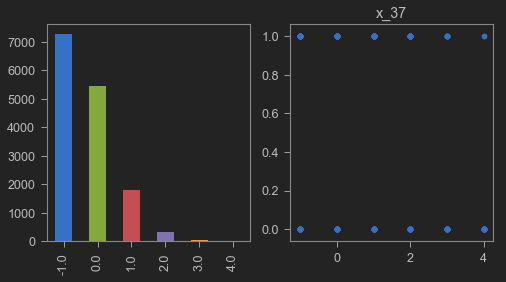

-1.0     7264
 1.0     2949
 0.0     2415
 2.0     1176
 3.0      503
 4.0      290
 5.0      158
 6.0       75
 7.0       29
 8.0       23
 9.0       11
 10.0       7
 12.0       5
 11.0       5
 14.0       3
 18.0       2
 40.0       1
 33.0       1
 21.0       1
 15.0       1
Name: x_38, dtype: int64


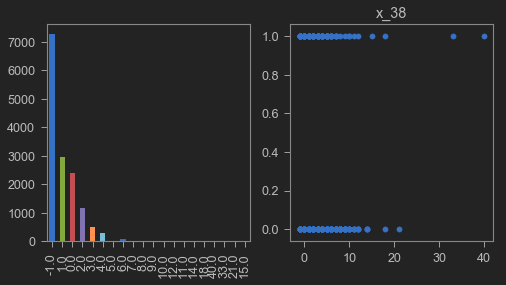

 2.0     4690
 1.0     4537
 3.0     1831
 4.0     1470
 10.0     625
 6.0      468
 5.0      437
 7.0      337
 8.0      230
 9.0      226
-1.0       47
 0.0       21
Name: x_39, dtype: int64


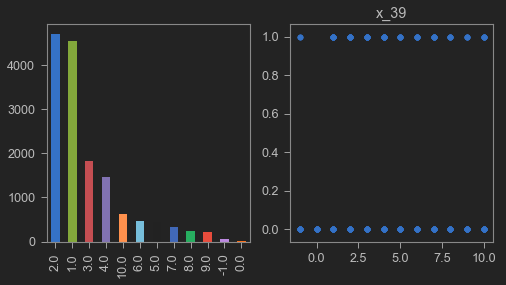

 2.0     3406
 1.0     2245
 4.0     2032
 7.0     1419
 3.0     1216
 10.0    1088
 8.0      936
 6.0      885
 5.0      885
 9.0      739
-1.0       47
 0.0       21
Name: x_40, dtype: int64


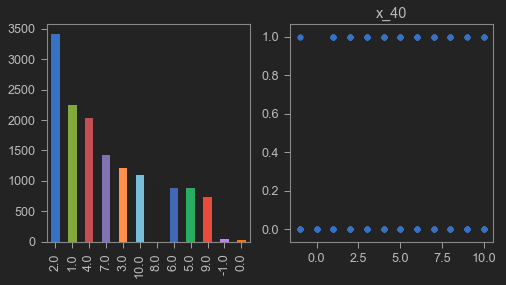

 2.0     3463
 3.0     2030
 5.0     1974
 4.0     1901
 6.0     1702
 7.0     1323
 8.0      794
 1.0      766
 9.0      550
 10.0     147
 11.0      81
-1.0       47
 12.0      45
 15.0      31
 13.0      23
 0.0       21
 14.0      21
Name: x_41, dtype: int64


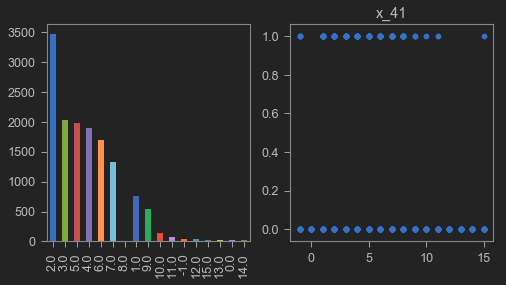

 2.0     3567
 4.0     1716
 3.0     1700
 5.0     1537
 6.0     1514
 7.0     1434
 8.0     1266
 9.0     1120
 10.0     394
 1.0      215
 15.0     110
 11.0     105
 12.0      67
 14.0      57
 13.0      49
-1.0       47
 0.0       21
Name: x_42, dtype: int64


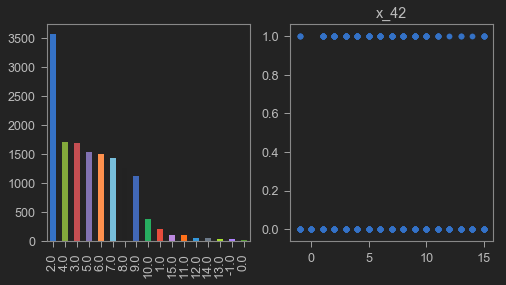

 10.0    2694
 3.0     2087
 4.0     1919
 9.0     1902
 5.0     1682
 6.0     1509
 8.0     1077
 7.0     1072
 2.0      824
 1.0       85
-1.0       47
 0.0       21
Name: x_43, dtype: int64


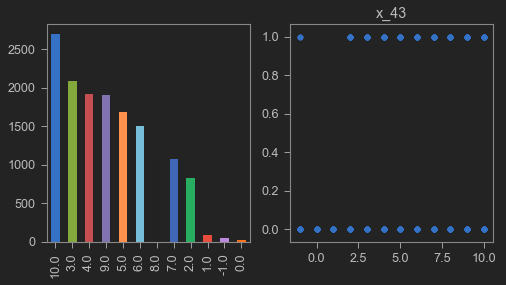

 10.0    2998
 8.0     2108
 7.0     2049
 6.0     2030
 9.0     2003
 5.0     1538
 4.0      917
 3.0      747
 2.0      392
 1.0       69
-1.0       47
 0.0       21
Name: x_44, dtype: int64


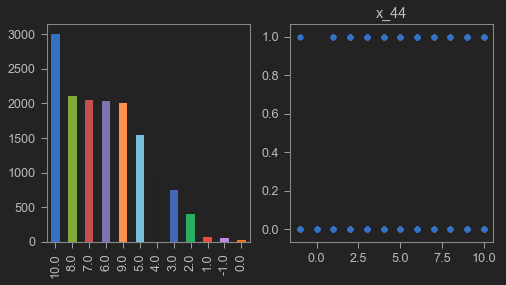

 2.0     3798
 3.0     2263
 1.0     2117
 4.0     1701
 5.0     1301
 6.0      997
 7.0      795
 10.0     653
 8.0      624
 9.0      602
-1.0       47
 0.0       21
Name: x_45, dtype: int64


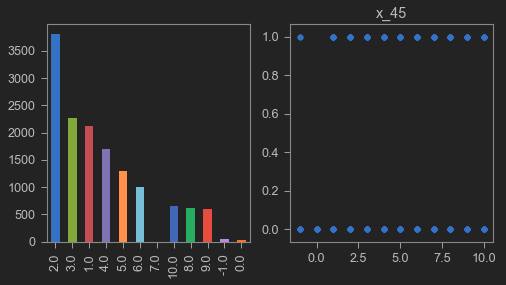

 1.0     5474
 3.0     3678
 2.0     3207
 4.0     1572
 5.0      644
 6.0      202
 7.0       48
-1.0       47
 8.0       24
 0.0       21
 10.0       2
Name: x_46, dtype: int64


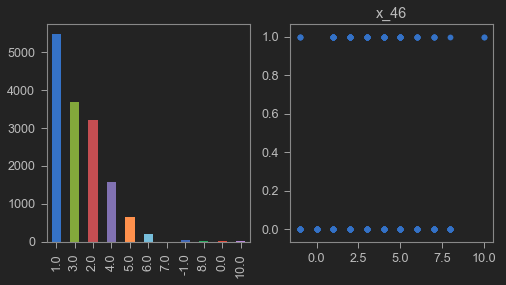

 2.0     3214
 4.0     1752
 3.0     1732
 5.0     1617
 6.0     1552
 7.0     1283
 8.0     1249
 9.0     1154
 10.0     423
 1.0      415
 15.0     142
 11.0     117
 12.0      78
 14.0      63
 13.0      60
-1.0       47
 0.0       21
Name: x_47, dtype: int64


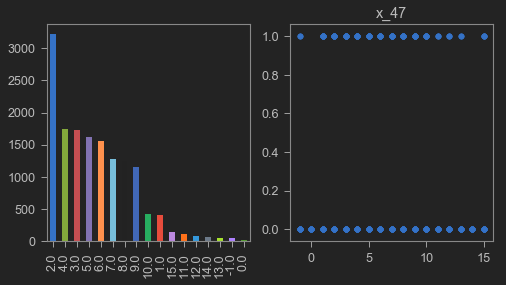

 10.0    1836
 7.0     1831
 8.0     1820
 9.0     1748
 6.0     1747
 5.0     1666
 4.0     1574
 3.0     1213
 2.0      908
 1.0      508
-1.0       68
Name: x_48, dtype: int64


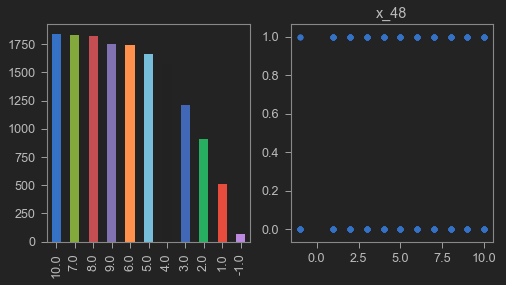

 1.0    9623
 2.0    4956
 3.0     261
-1.0      47
 0.0      23
 4.0       9
Name: x_49, dtype: int64


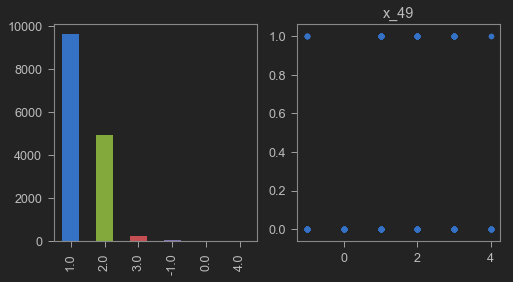

 2.0     4892
 3.0     3520
 1.0     2172
 4.0     2110
 5.0     1095
 6.0      529
 7.0      239
 8.0      133
 9.0      107
 10.0      54
-1.0       47
 0.0       21
Name: x_50, dtype: int64


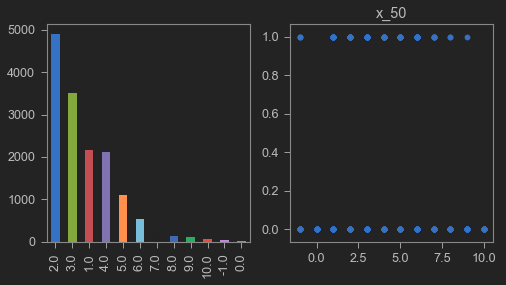

 2.0     3590
 3.0     1942
 5.0     1849
 4.0     1782
 6.0     1632
 7.0     1226
 1.0     1161
 8.0      758
 9.0      551
 10.0     136
 11.0      85
 12.0      49
-1.0       47
 15.0      37
 13.0      36
 0.0       21
 14.0      17
Name: x_51, dtype: int64


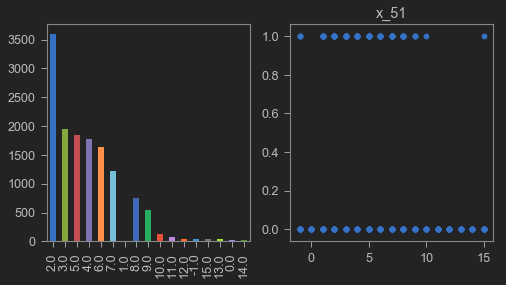

 2.0     3870
 1.0     1919
 3.0     1774
 5.0     1653
 4.0     1599
 6.0     1302
 7.0     1164
 8.0      708
 9.0      497
 10.0     149
 11.0      84
-1.0       47
 12.0      44
 15.0      40
 13.0      31
 0.0       21
 14.0      17
Name: x_52, dtype: int64


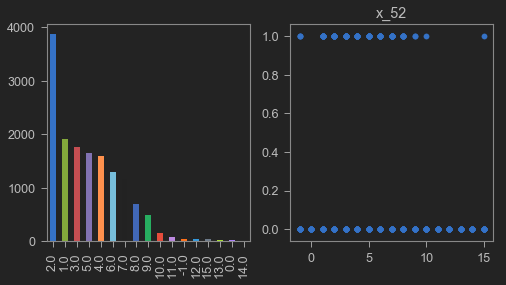

 2.0     3369
 5.0     2075
 3.0     2038
 4.0     1961
 6.0     1750
 7.0     1389
 8.0      818
 9.0      581
 1.0      569
 10.0     131
 11.0      76
-1.0       47
 12.0      30
 13.0      28
 15.0      25
 0.0       21
 14.0      11
Name: x_53, dtype: int64


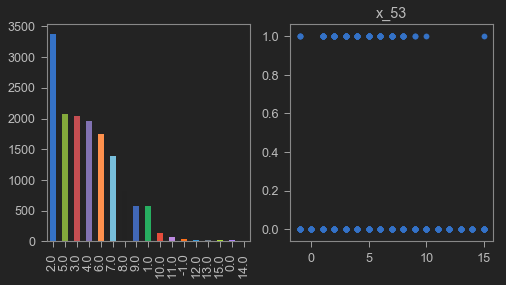

 2.0     2404
 5.0     1767
 4.0     1723
 3.0     1584
 7.0     1380
 6.0     1366
 9.0     1315
 8.0     1274
 1.0     1059
 10.0     410
 15.0     201
 11.0     124
 14.0      97
 12.0      78
 13.0      69
-1.0       47
 0.0       21
Name: x_54, dtype: int64


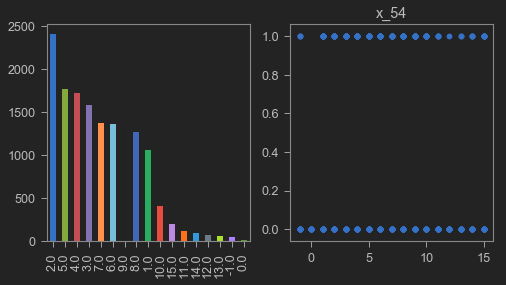

 2.0     3490
 3.0     1916
 4.0     1723
 5.0     1596
 9.0     1220
 6.0     1115
 8.0     1028
 7.0     1003
 10.0     863
 1.0      475
 11.0     233
 12.0     100
-1.0       47
 15.0      35
 13.0      31
 14.0      23
 0.0       21
Name: x_55, dtype: int64


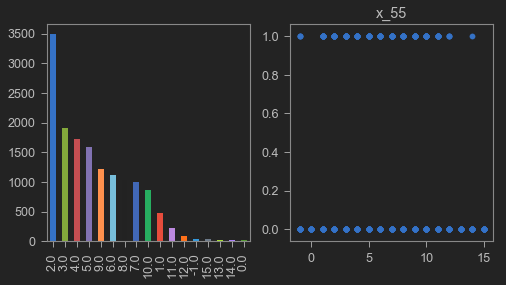

 2.0     3691
 3.0     1597
 4.0     1307
 9.0     1284
 5.0     1241
 7.0     1213
 6.0     1121
 8.0     1098
 10.0     986
 1.0      799
 11.0     257
 12.0     128
 15.0      50
 13.0      48
-1.0       47
 14.0      31
 0.0       21
Name: x_56, dtype: int64


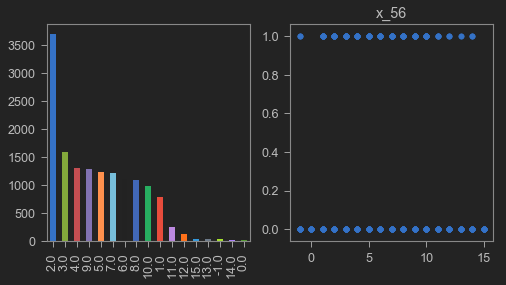

 3.0     1898
 1.0     1689
 2.0     1630
 4.0     1535
 9.0     1449
 7.0     1305
 5.0     1298
 8.0     1248
 6.0     1193
 10.0     920
 11.0     327
 12.0     166
 15.0      88
 13.0      58
 14.0      47
-1.0       47
 0.0       21
Name: x_57, dtype: int64


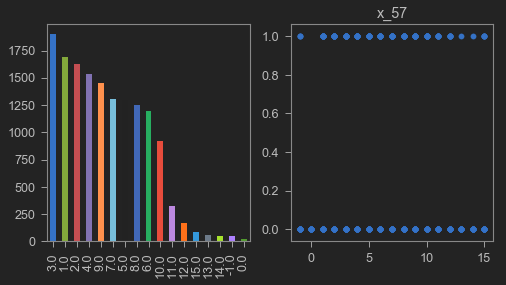

 1.0     11805
 2.0      1289
 3.0       932
 4.0       535
 5.0       149
-1.0        68
 6.0        68
 7.0        31
 10.0       19
 9.0        12
 8.0        11
Name: x_58, dtype: int64


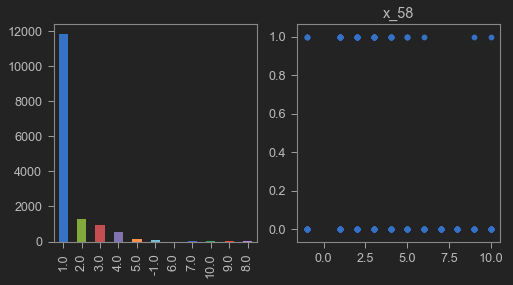

 3.0     2627
 1.0     2189
 5.0     1803
 2.0     1720
 4.0     1645
 6.0     1482
 7.0     1172
 8.0     1012
 9.0      766
 10.0     435
-1.0       47
 0.0       21
Name: x_59, dtype: int64


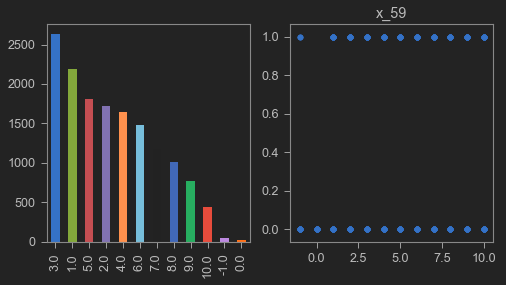

 1.0     2189
 3.0     2050
 4.0     1847
 2.0     1799
 5.0     1503
 8.0     1385
 6.0     1234
 7.0     1172
 9.0     1000
 10.0     672
-1.0       47
 0.0       21
Name: x_60, dtype: int64


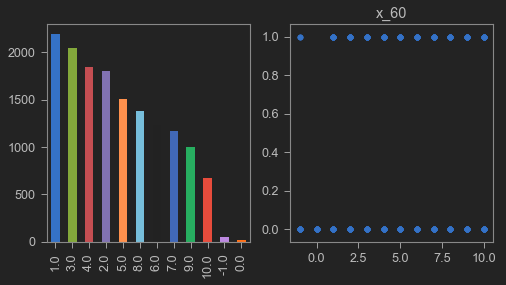

 1.0    11869
 2.0     2239
 3.0      626
 4.0      103
-1.0       47
 0.0       21
 5.0       14
Name: x_61, dtype: int64


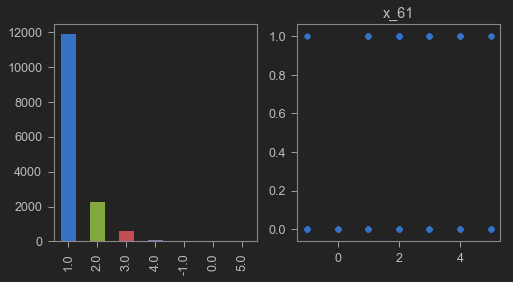

 1.0    8885
 2.0    3817
 3.0    1725
 4.0     369
 5.0      55
-1.0      47
 0.0      21
Name: x_62, dtype: int64


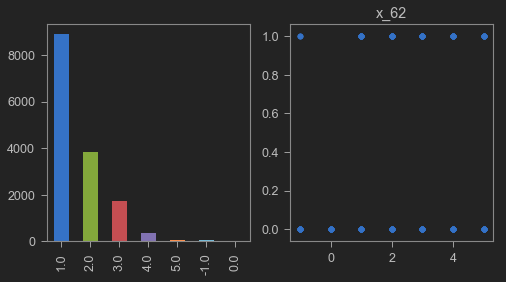

 1.0    6251
 2.0    4523
 3.0    2899
 4.0     988
 5.0     190
-1.0      47
 0.0      21
Name: x_63, dtype: int64


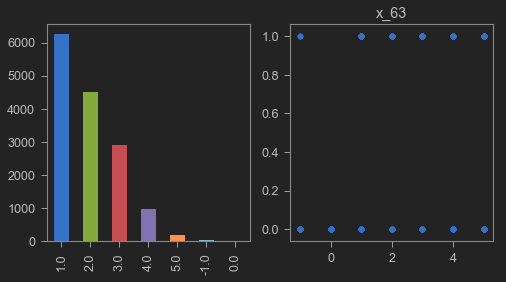

 1.0     6671
 3.0     3100
 4.0     1536
 2.0     1295
 10.0     731
 6.0      436
 5.0      374
 7.0      287
 8.0      214
 9.0      207
-1.0       47
 0.0       21
Name: x_64, dtype: int64


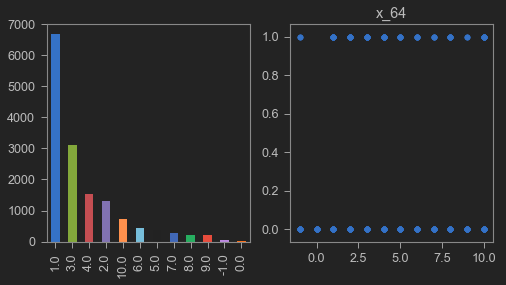

 1.0     4881
 2.0     4084
 3.0     2108
 4.0     1431
 10.0     679
 6.0      474
 5.0      403
 7.0      330
 8.0      248
 9.0      213
-1.0       47
 0.0       21
Name: x_65, dtype: int64


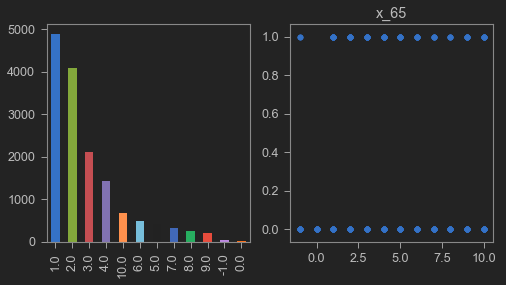

 2.0     5032
 1.0     4247
 3.0     1845
 4.0     1427
 10.0     557
 5.0      535
 6.0      447
 7.0      367
 8.0      199
 9.0      195
-1.0       47
 0.0       21
Name: x_66, dtype: int64


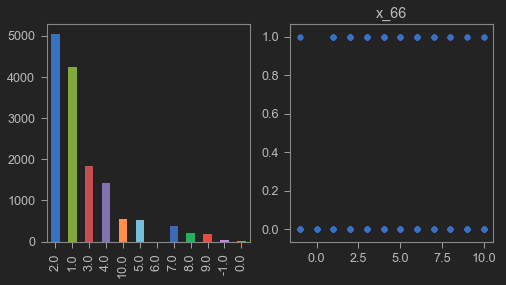

 1.0     4248
 10.0    3952
 9.0     1210
 7.0     1056
 5.0      912
 6.0      872
 2.0      790
 8.0      710
 3.0      575
 4.0      526
-1.0       47
 0.0       21
Name: x_67, dtype: int64


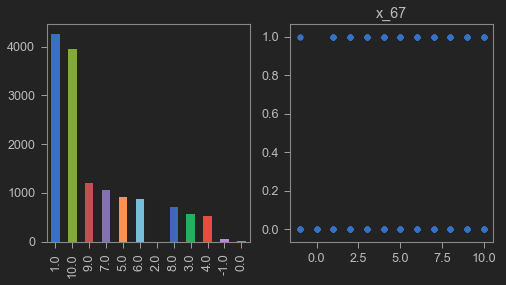

 1.0     3918
 9.0     1543
 6.0     1540
 7.0     1359
 5.0     1359
 4.0     1171
 10.0    1090
 8.0     1043
 3.0     1027
 2.0      801
-1.0       47
 0.0       21
Name: x_68, dtype: int64


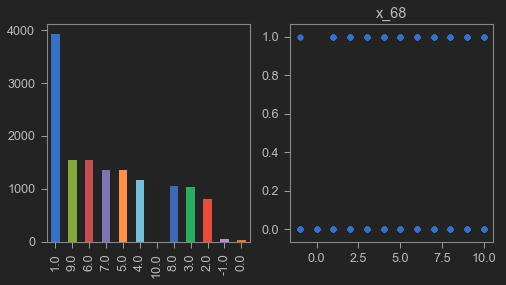

 1.0     3598
 3.0     2978
 4.0     1856
 10.0    1752
 2.0     1686
 5.0     1092
 6.0      578
 7.0      468
 8.0      423
 9.0      420
-1.0       47
 0.0       21
Name: x_69, dtype: int64


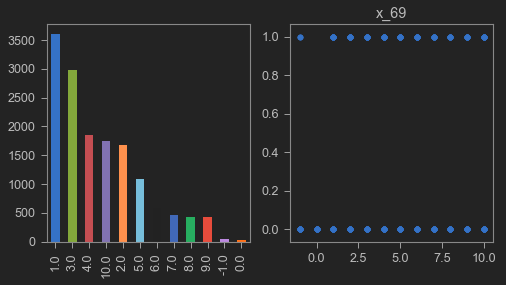

 1.0    14810
-1.0       47
 2.0       33
 0.0       21
 5.0        3
 4.0        2
 6.0        2
 9.0        1
Name: x_70, dtype: int64


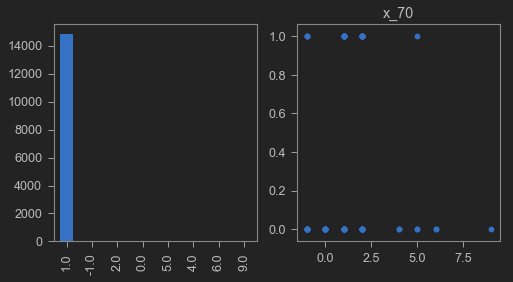

 1.0    14810
-1.0       47
 0.0       21
 2.0       18
 3.0       17
 4.0        2
 5.0        2
 7.0        1
 6.0        1
Name: x_71, dtype: int64


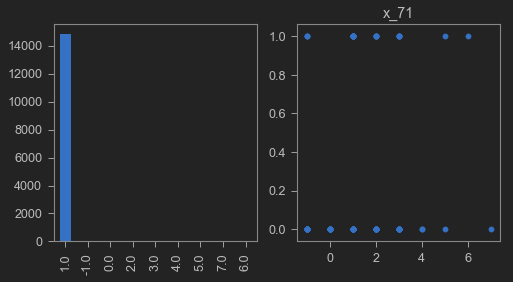

 1.0     14761
 2.0        67
-1.0        47
 0.0        21
 3.0         9
 5.0         5
 4.0         5
 6.0         2
 9.0         1
 10.0        1
Name: x_72, dtype: int64


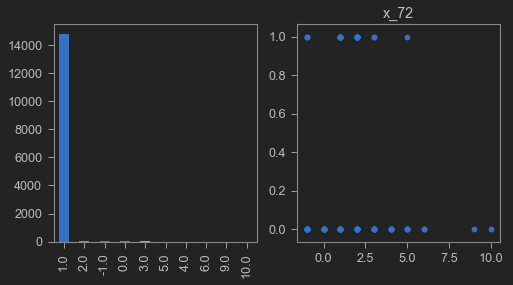

 1.0    14761
-1.0       47
 2.0       42
 3.0       29
 0.0       21
 4.0       11
 7.0        3
 5.0        3
 6.0        2
Name: x_73, dtype: int64


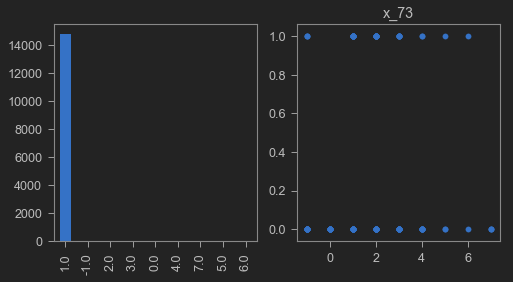

 1.0     14736
 2.0        82
-1.0        47
 0.0        21
 3.0        15
 4.0         8
 5.0         4
 6.0         3
 9.0         1
 10.0        1
 7.0         1
Name: x_74, dtype: int64


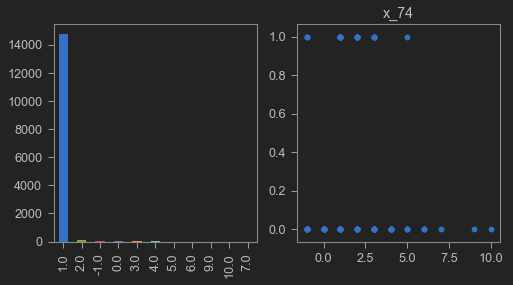

 1.0    14736
 2.0       54
-1.0       47
 3.0       35
 0.0       21
 4.0       17
 5.0        4
 7.0        2
 6.0        2
 8.0        1
Name: x_75, dtype: int64


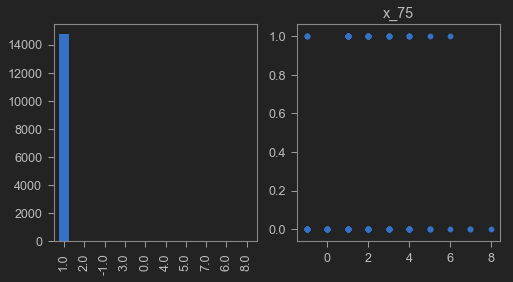

 1.0     14674
 2.0       117
-1.0        47
 3.0        27
 0.0        21
 4.0        19
 5.0         5
 7.0         4
 6.0         3
 9.0         1
 10.0        1
Name: x_76, dtype: int64


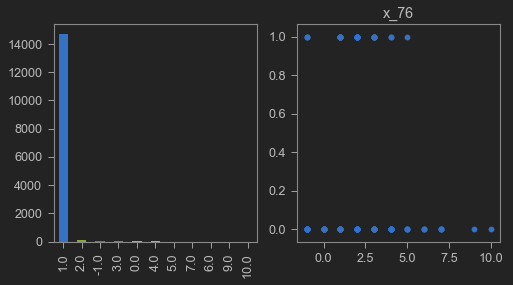

 1.0     14674
 2.0        82
 3.0        51
-1.0        47
 4.0        23
 0.0        21
 5.0        10
 6.0         5
 7.0         3
 10.0        2
 8.0         1
Name: x_77, dtype: int64


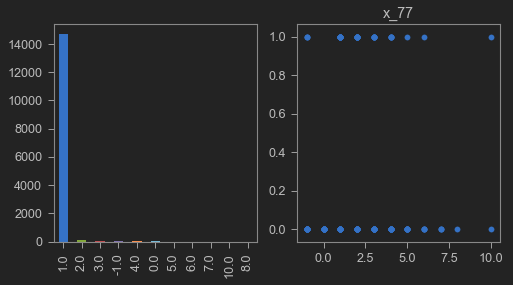

 6.0    4932
 2.0    2501
 3.0    2417
 7.0    2236
 1.0    1220
 5.0     965
 4.0     429
 8.0     151
-1.0      68
Name: x_78, dtype: int64


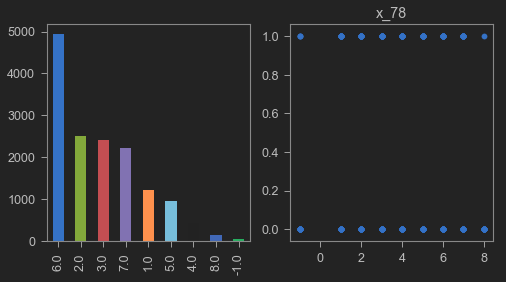

 1.0    3098
 2.0    2914
 3.0    2193
 4.0    1392
 5.0    1353
 6.0    1093
 7.0    1010
 8.0     971
 9.0     827
-1.0      47
 0.0      21
Name: x_79, dtype: int64


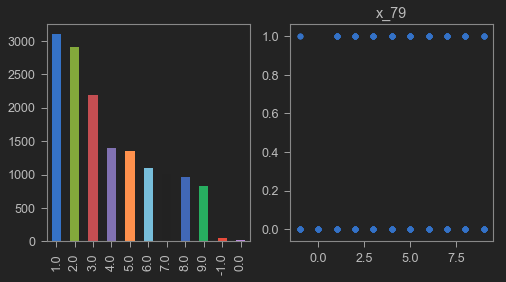

0.728873    157
0.725352    156
0.727700    148
0.733568    146
0.719484    145
0.730047    138
0.754695    136
0.740610    135
0.738263    134
0.744131    134
0.735915    133
0.745305    133
0.726526    131
0.739437    128
0.724178    128
0.723005    127
0.721831    126
0.734742    125
0.742958    125
0.752347    121
0.746479    119
0.747653    119
0.731221    119
0.750000    117
0.720657    116
0.714789    115
0.748826    115
0.767606    115
0.758216    114
0.741784    114
           ... 
0.963615      2
0.957746      2
0.938967      2
0.976526      2
0.955399      2
0.649061      2
0.654930      2
0.672535      2
0.652582      1
0.968310      1
0.960094      1
0.970657      1
1.000000      1
0.961268      1
0.987089      1
0.980047      1
0.647887      1
0.949531      1
0.996479      1
0.663146      1
0.657277      1
0.646714      1
0.664319      1
0.656103      1
0.954225      1
0.969484      1
0.962441      1
0.974178      1
0.967136      1
0.971831      1
Name: x_80, Length: 276,

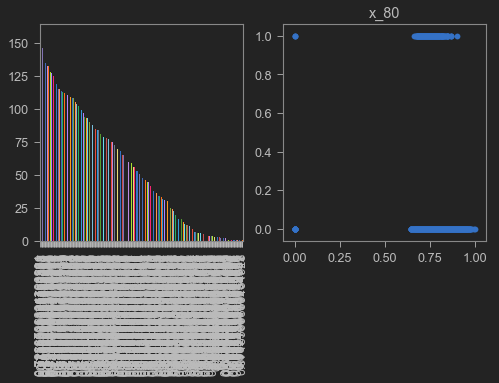

0.950998    287
0.967332    269
0.927405    264
0.943739    263
0.921960    260
0.931034    259
0.876588    255
0.938294    255
0.970962    254
0.907441    251
0.880218    251
0.945554    251
0.865699    251
0.891107    250
0.965517    250
0.871143    250
0.872958    250
0.963702    249
0.874773    249
0.885662    249
0.905626    248
0.925590    247
0.929220    247
0.941924    247
0.958258    245
0.969147    245
0.932849    244
0.934664    244
0.918330    244
0.900181    241
           ... 
0.553539      4
0.591652      4
0.604356      4
0.555354      4
0.548094      4
0.529946      4
0.511797      4
0.502722      4
0.571688      4
0.524501      3
0.578947      3
0.528131      3
0.515426      3
0.577132      3
0.580762      3
0.509982      3
0.504537      3
0.606171      3
0.557169      2
0.582577      2
0.544465      2
0.589837      2
1.000000      1
0.852995      1
0.994555      1
0.836661      1
0.974592      1
0.829401      1
0.990926      1
0.558984      1
Name: x_81, Length: 128,

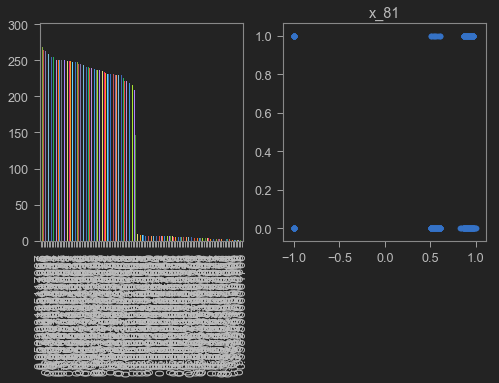

 1.0    13167
 3.0     1374
 4.0      269
 5.0       64
-1.0       45
Name: x_82, dtype: int64


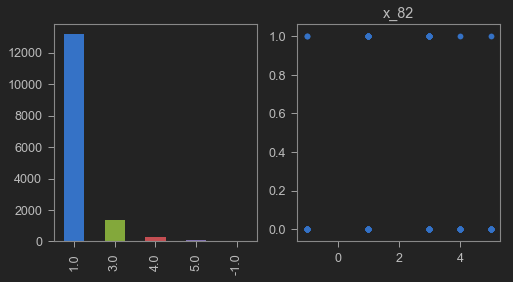

 1.0     10834
 2.0       945
 4.0       896
 3.0       765
 5.0       711
 6.0       368
 7.0       134
 10.0      107
 8.0        93
-1.0        45
 9.0        21
Name: x_83, dtype: int64


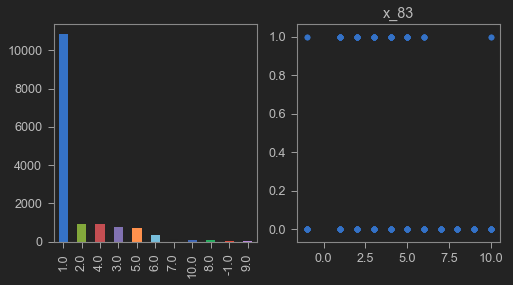

 1.0     11005
 3.0      1863
 2.0      1348
 4.0       207
 5.0       102
 11.0       95
 6.0        53
 7.0        49
-1.0        45
 8.0        40
 9.0        33
 10.0       29
 16.0       15
 13.0       14
 12.0       10
 14.0        6
 15.0        5
Name: x_84, dtype: int64


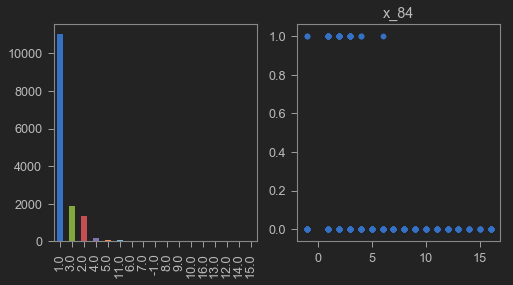

 1.0    13813
 3.0      796
 4.0      199
-1.0       45
 5.0       45
 6.0       21
Name: x_85, dtype: int64


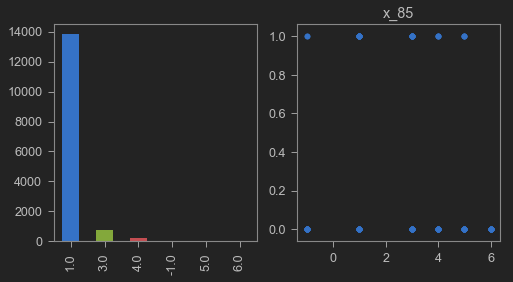

 1.0     13813
 4.0       306
 3.0       259
 5.0       188
 2.0       104
 6.0        88
-1.0        45
 7.0        44
 8.0        29
 9.0        24
 10.0       19
Name: x_86, dtype: int64


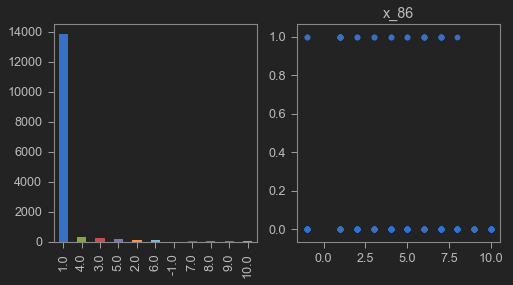

 1.0    13813
 3.0      526
 2.0      478
 4.0       52
-1.0       45
 5.0        4
 6.0        1
Name: x_87, dtype: int64


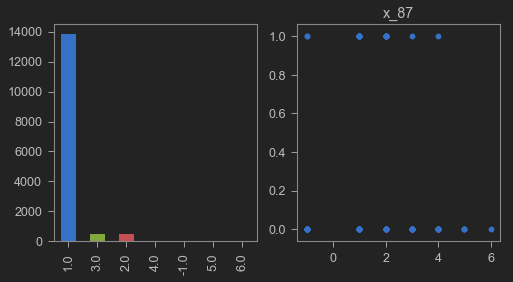

 1.0     12652
 2.0       572
 3.0       326
 4.0       216
 9.0       214
 10.0      144
 8.0       138
 6.0       135
 5.0       133
 7.0        96
 14.0       75
 11.0       72
-1.0        45
 12.0       43
 15.0       37
 13.0       21
Name: x_88, dtype: int64


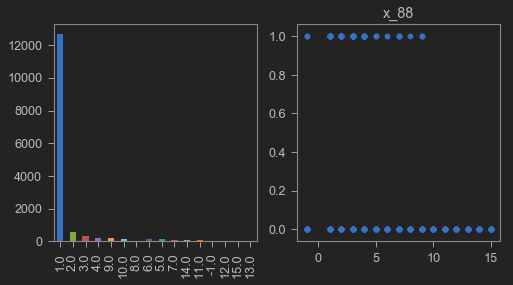

 1.0     14681
-1.0        45
 8.0        37
 2.0        35
 9.0        32
 10.0       31
 11.0       15
 6.0        10
 7.0         9
 13.0        5
 14.0        5
 12.0        5
 5.0         4
 15.0        3
 17.0        1
 4.0         1
Name: x_89, dtype: int64


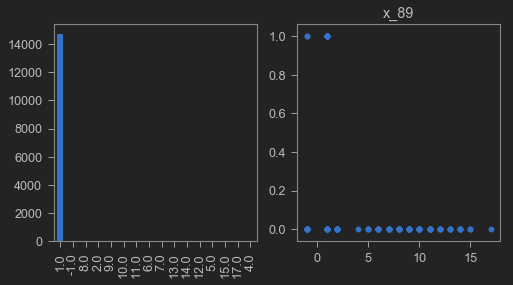

 1.0    13195
 2.0     1128
 3.0      522
-1.0       74
Name: x_90, dtype: int64


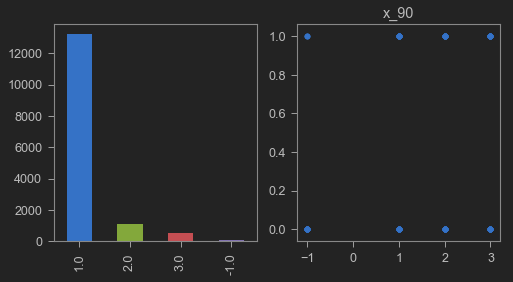

 1.0    14009
-1.0      673
 2.0      177
 5.0       60
Name: x_91, dtype: int64


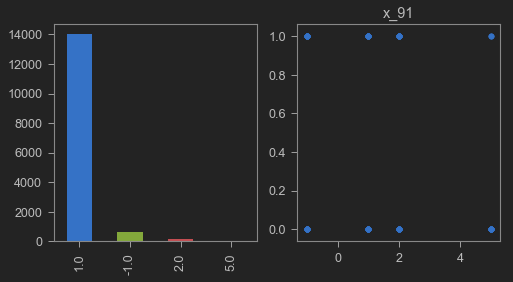

-1.000000    10711
 0.052083      425
 0.083333      406
 0.010417      386
 0.125000      338
 0.208333      212
 0.333333      197
 0.177083      183
 0.020833      179
 0.093750      149
 0.500000      135
 0.250000      132
 0.375000      120
 0.458333      120
 0.302083      106
 0.114583      103
 0.041667       97
 0.135417       96
 0.218750       72
 0.625000       55
 0.343750       52
 0.427083       51
 0.239583       49
 0.145833       44
 0.364583       39
 0.062500       37
 0.468750       36
 0.583333       34
 0.750000       33
 0.166667       30
             ...  
 0.489583       19
 0.708333       15
 0.875000       13
 0.593750       12
 0.072917       11
 0.395833       11
 0.385417       11
 0.291667       11
 0.718750       10
 0.416667        8
 0.187500        8
 0.833333        7
 0.968750        7
 0.614583        6
 0.958333        5
 0.843750        5
 0.677083        3
 0.197917        3
 0.031250        2
 0.739583        2
 0.562500        1
 0.885417   

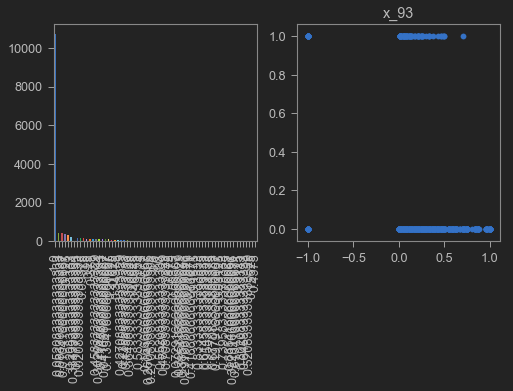

-1.000000    2684
 0.106383     593
 0.074468     463
 0.127660     424
 0.212766     362
 0.170213     355
 0.436170     322
 0.468085     302
 0.255319     296
 0.297872     289
 0.244681     262
 0.223404     261
 0.404255     258
 0.265957     254
 0.276596     250
 0.287234     247
 0.234043     237
 0.329787     231
 0.340426     226
 0.202128     219
 0.138298     212
 0.382979     208
 0.191489     206
 0.319149     201
 0.393617     194
 0.159574     193
 0.351064     189
 0.414894     188
 0.372340     184
 0.425532     179
             ... 
 0.723404      61
 0.755319      60
 0.617021      59
 0.808511      59
 0.712766      58
 0.734043      56
 0.702128      56
 0.063830      43
 0.819149      32
 0.053191      31
 0.744681      29
 0.861702      22
 0.872340      22
 0.000000      19
 0.829787      18
 0.840426      18
 0.851064      15
 0.893617      12
 0.882979      12
 0.968085      10
 0.904255       8
 0.042553       8
 0.946809       5
 0.925532       5
 0.936170 

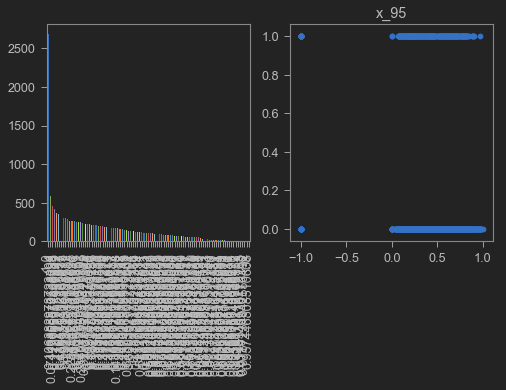

In [133]:
'''
离散化：
x_3: 分>=2为一类，其余各自为一类，下同
x_4：分>=4 为一类，其余各自为一类
x_5: 不可分，一个数值一个类
x_6: 不可分，分0和缺失类
x_7: one-hot
x_8: one-hot
x_9: >=2为一类
x_10: >=4为一类
x_11: one-hot -> >=4
x_12: 不可分，分0和缺失类
x_13: >=18为一类[y=1]//保留or one-hot ->[18]
x_14: >=14为一类[y=1]//保留or one-hot
x_15: >=2为一类
x_16: >=5
x_17: one-hot
x_18: 0 和 缺失类 【X】
x_19: >=13
x_20: one-hot
x_21: >=2为一类
x_22: one-hot
x_23: 0 和缺失类 【X】
x_24: >=30[y=1],cut[-1,0,10,20,30+]【极其相似】//保留or one-hot
x_25: >=2
x_26: >=6
x_27: one-hot
x_28: 0和缺失类 【X】
x_29: >=16
x_30: >=13
x_31: >=2 为一类
x_32: one-hot
x_33: one-hot
x_34: 0 和缺失类 【X】
x_35: >=60[y=1],cut[-1,0,10,20,30,40,50,60,60+] 【极其相似】//保留or one-hot
x_36: >=40[y=1],cut[-1,0,10,20,30,40,40+] 【极其相似】//保留or one-hot
x_37: one-hot
x_38: >=30[y=1],cut[-1,0,10,20,30,30+] 【极其相似】//保留or one-hot
x_39: one-hot 【X】
x_40: one-hot
x_41: one-hot
x_42: one-hot
x_43: one-hot
x_44: one-hot
x_45: one-hot
x_46: >=10
x_47: one-hot
x_48-x_69: one-hot
x_70： >=6
x_71: one-hot
x_72： >=6
x_73: one-hot
x_74: >=6
x_75: one-hot
x_76: >=6
x_77: one-hot
x_78: one-hot
x_79: one-hot
x_80: 保留原变量并生成分类变量[0,0.68,0.9,1]
x_81: 保留原变量并生成分类变量[0,0.5,0.8,1]
x_82: one-hot
x_83: one-hot
x_84: >=7
x_85-x_87: one-hot
x_88: >=10
x_89: >=2
x_90: one-hot
x_91: one-hot
x_93: 填充缺失值
x_95: 填充缺失值
x_146/x_154 【X】
连续变量：
x_1
x_2
x_80
x_81
x_93
x_95
'''
# discrete_detect(['x_3','x_4','x_5'])
# discrete_detect(['x_6','x_7','x_8'])
# discrete_detect(['x_9','x_10','x_11'])
# discrete_detect(['x_12','x_13','x_14'])
# discrete_detect(['x_15','x_16','x_17'])
# discrete_detect(['x_18','x_19','x_20'])
# discrete_detect(['x_21','x_22','x_23'])
# discrete_detect(['x_24','x_25','x_26'])
# discrete_detect(['x_27','x_28','x_29'])
# discrete_detect(['x_30','x_31','x_32'])
discrete_detect(numeric_var.columns[2:])
# numeric_var["x_24"].sort_values().plot()
# numeric_var["x_29"].sort_values().plot()
# numeric_var["x_35"].sort_values().plot()
# numeric_var["x_36"].sort_values().plot()
# numeric_var["x_80"].sort_values().plot()
# numeric_var["x_81"].sort_values().plot()
# numeric_var["x_93"].sort_values().plot()
# numeric_var["x_95"].sort_values().plot()

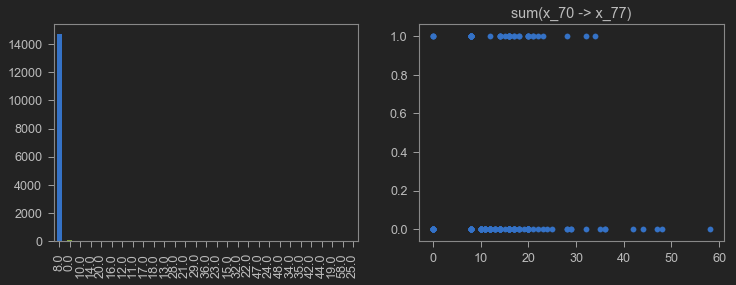

y,0,1
row_0,,
0.0,65,3
8.0,14015,659
10.0,29,0
11.0,11,0
12.0,19,1
13.0,5,0
14.0,21,4
15.0,1,1
16.0,15,6


In [134]:
# pd.crosstab(train_xy["x_70"],train_xy.y)
# pd.crosstab(train_xy["x_71"],train_xy.y)
# pd.crosstab(train_xy["x_72"],train_xy.y)
# pd.crosstab(train_xy["x_73"],train_xy.y)
# pd.crosstab(train_xy["x_74"],train_xy.y)
# pd.crosstab(train_xy["x_75"],train_xy.y)
# pd.crosstab(train_xy["x_76"],train_xy.y)
# pd.crosstab(train_xy["x_77"],train_xy.y)
x_70_77_sum = train_xy[["x_%s" % i for i in range(70,78)]].sum(1)
fig,axes = plt.subplots(1,2,figsize=(12,4))
x_70_77_sum.value_counts(dropna=False).plot(kind="bar",ax=axes[0])
axes[1].scatter(x_70_77_sum,train_xy.y)
plt.title("sum(x_70 -> x_77)")
plt.show()
pd.crosstab(x_70_77_sum,train_xy.y)

In [135]:
# train_xy.drop(["x_%s" % i for i in range(70,78)],axis=1,inplace=True) #放在后面，因为还要作图
train_xy["x_70to77"] = x_70_77_sum

### category var

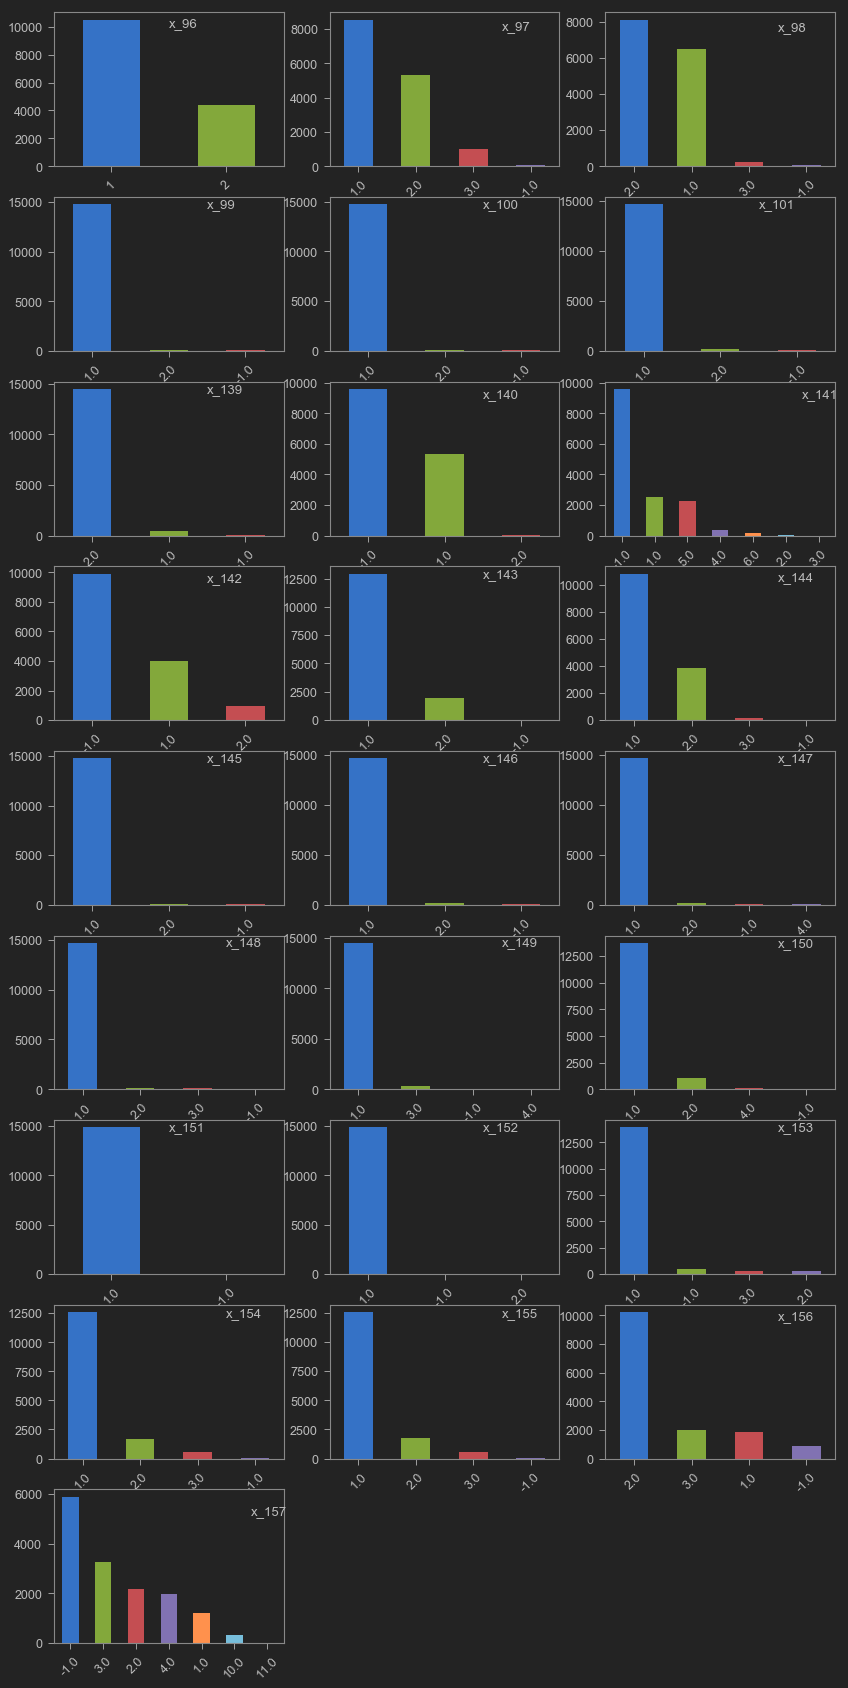

In [136]:
category_var = train_xy.loc[:,"x_96":"x_157"].fillna(-1)
ncol = 3
nrow = (len(category_var.columns) // ncol)+1
plt.figure(figsize=(14,30))
for i in range(len(category_var.columns)):
    ax = plt.subplot(nrow,ncol,i+1)
    category_var.iloc[:,i].value_counts(dropna=False).plot(kind="bar",ax=ax,rot=45)
    ax.set_ylabel("")
    ax.text(ax.get_xlim()[1]-1,ax.get_ylim()[1]-1000,str(category_var.columns[i]))

In [137]:
def discrete_detect_(col_list):
    for col in col_list:
        val_count = category_var[col].value_counts(dropna=False)
        print(val_count)
        fig,axes = plt.subplots(1,2,figsize=(8,4))
        val_count.plot(kind="bar",ax=axes[0])
        axes[1].scatter(category_var[col],train_xy.y)
        plt.title(col)
        plt.show()

1    10498
2     4421
Name: x_96, dtype: int64


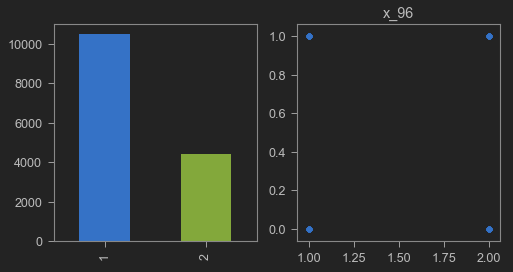

 1.0    8543
 2.0    5293
 3.0    1015
-1.0      68
Name: x_97, dtype: int64


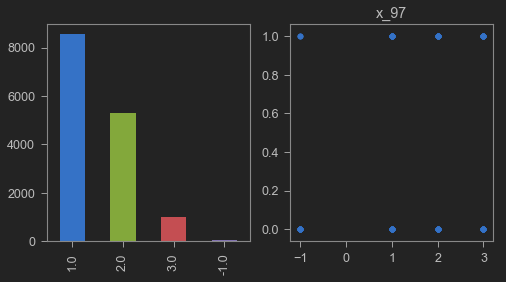

 2.0    8113
 1.0    6509
 3.0     229
-1.0      68
Name: x_98, dtype: int64


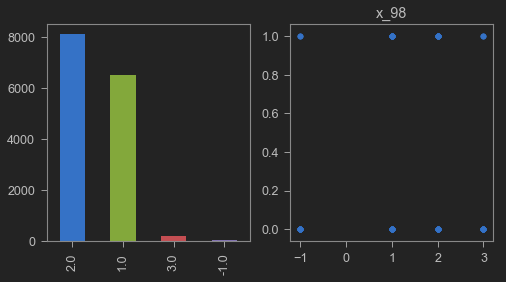

 1.0    14756
 2.0       95
-1.0       68
Name: x_99, dtype: int64


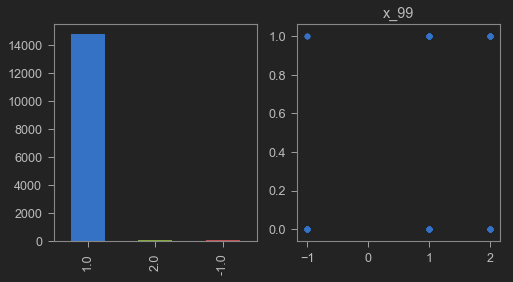

 1.0    14737
 2.0      114
-1.0       68
Name: x_100, dtype: int64


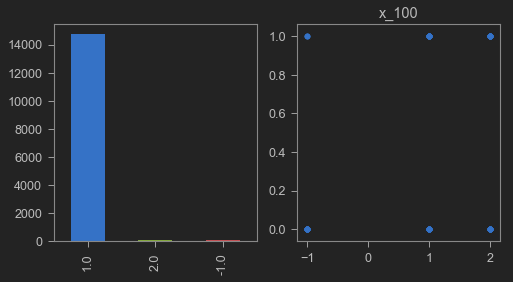

 1.0    14674
 2.0      177
-1.0       68
Name: x_101, dtype: int64


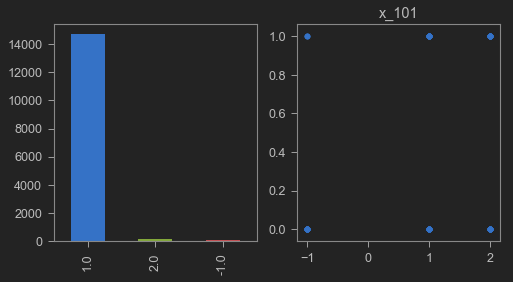

 2.0    14501
 1.0      413
-1.0        5
Name: x_139, dtype: int64


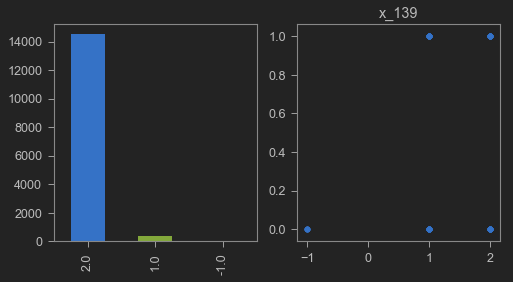

-1.0    9588
 1.0    5325
 2.0       6
Name: x_140, dtype: int64


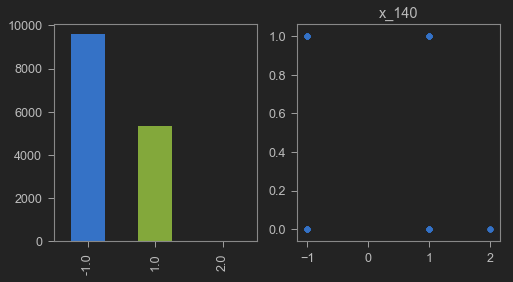

-1.0    9593
 1.0    2521
 5.0    2269
 4.0     367
 6.0     150
 2.0      18
 3.0       1
Name: x_141, dtype: int64


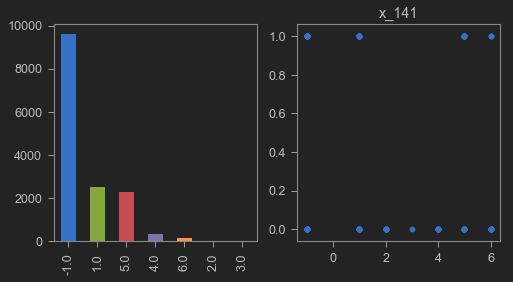

-1.0    9913
 1.0    4021
 2.0     985
Name: x_142, dtype: int64


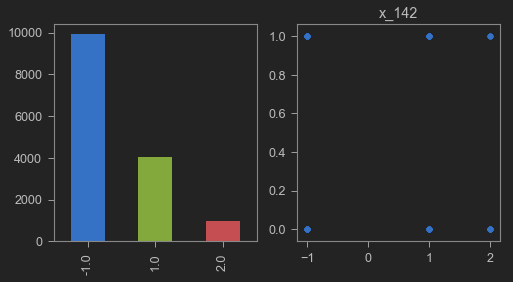

 1.0    12937
 2.0     1937
-1.0       45
Name: x_143, dtype: int64


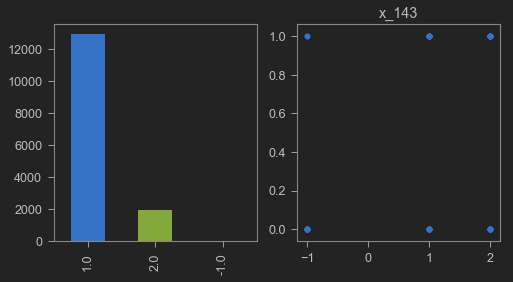

 1.0    10834
 2.0     3869
 3.0      171
-1.0       45
Name: x_144, dtype: int64


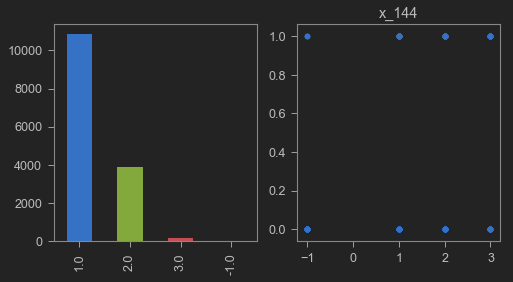

 1.0    14786
 2.0       88
-1.0       45
Name: x_145, dtype: int64


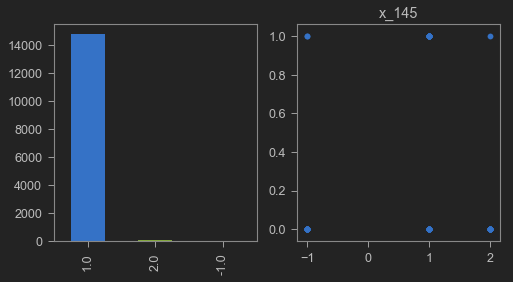

 1.0    14681
 2.0      193
-1.0       45
Name: x_146, dtype: int64


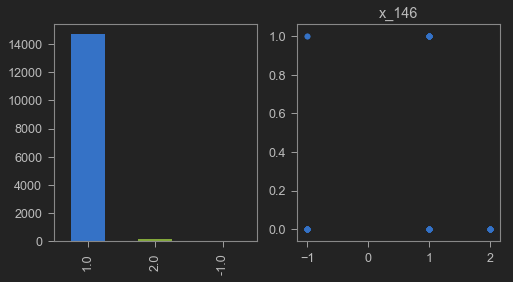

 1.0    14681
 2.0      158
-1.0       45
 4.0       35
Name: x_147, dtype: int64


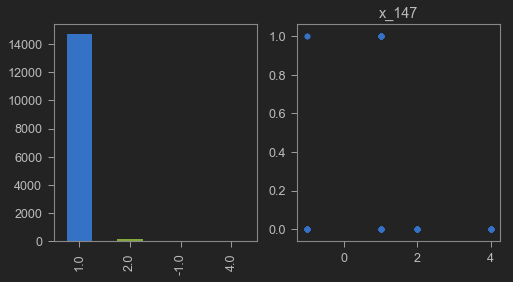

 1.0    14681
 2.0      102
 3.0       91
-1.0       45
Name: x_148, dtype: int64


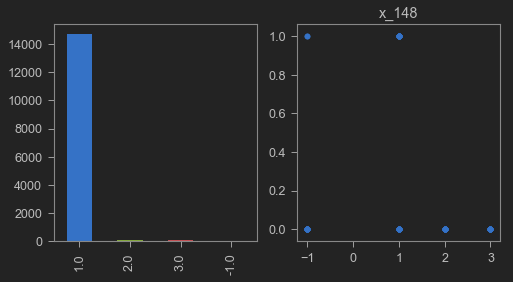

 1.0    14527
 3.0      324
-1.0       45
 4.0       23
Name: x_149, dtype: int64


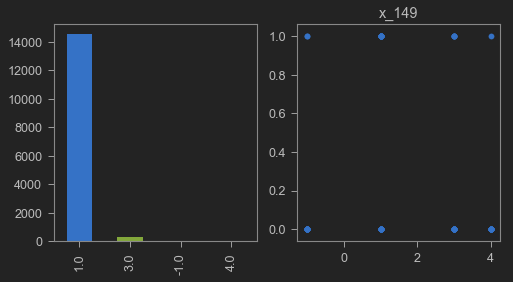

 1.0    13716
 2.0     1035
 4.0      123
-1.0       45
Name: x_150, dtype: int64


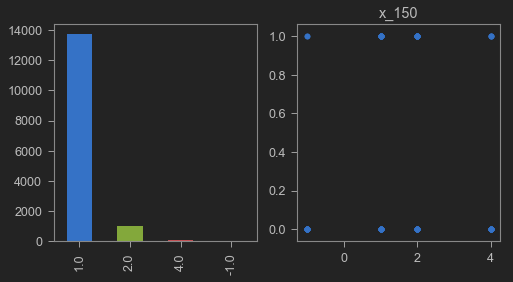

 1.0    14874
-1.0       45
Name: x_151, dtype: int64


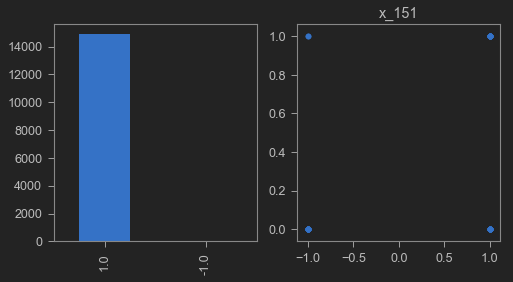

 1.0    14872
-1.0       45
 2.0        2
Name: x_152, dtype: int64


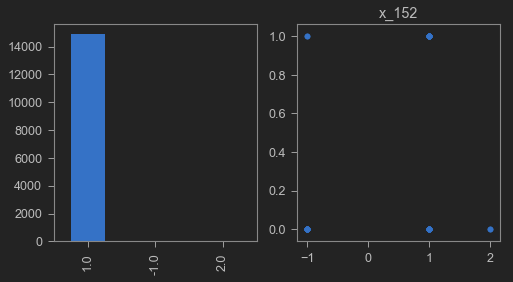

 1.0    13924
-1.0      471
 3.0      280
 2.0      244
Name: x_153, dtype: int64


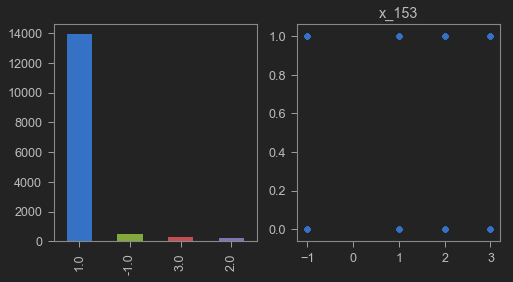

 1.0    12590
 2.0     1725
 3.0      530
-1.0       74
Name: x_154, dtype: int64


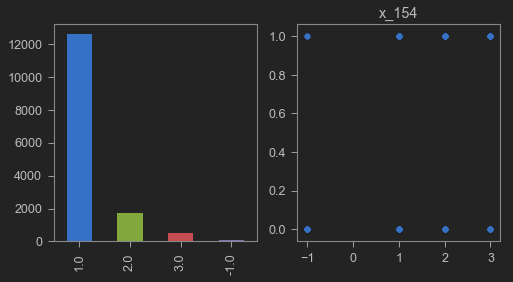

 1.0    12557
 2.0     1743
 3.0      545
-1.0       74
Name: x_155, dtype: int64


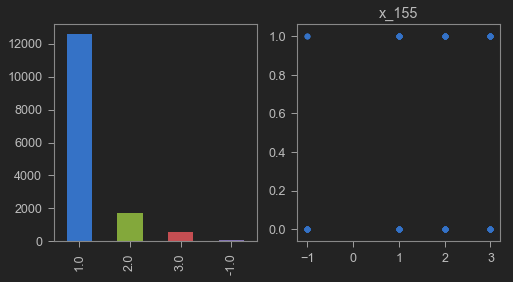

 2.0    10230
 3.0     1975
 1.0     1825
-1.0      889
Name: x_156, dtype: int64


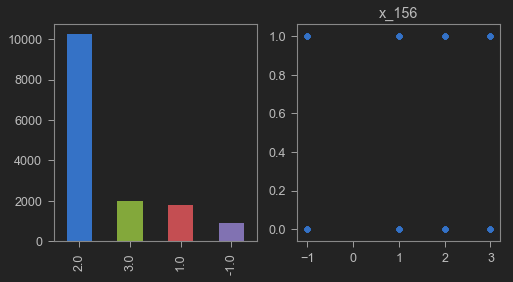

-1.0     5881
 3.0     3258
 2.0     2167
 4.0     1983
 1.0     1212
 10.0     330
 11.0      88
Name: x_157, dtype: int64


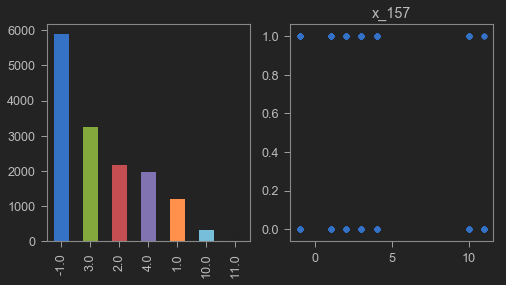

In [138]:
discrete_detect_(category_var.columns)

In [139]:
pd.crosstab(train_xy["x_151"],train_xy["y"],dropna=False)
pd.crosstab(train_xy["x_152"],train_xy["y"],dropna=False)
train_xy.drop(["x_151",'x_152'],axis=1,inplace=True)

### outliers

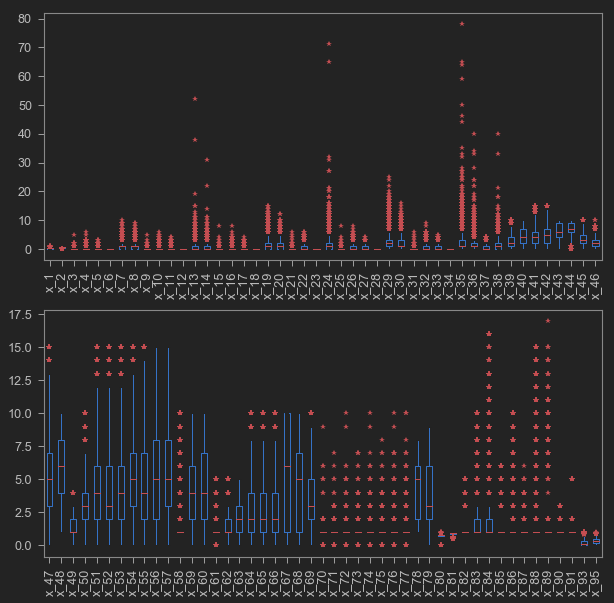

In [140]:
numeric_var = train_xy.loc[:,"x_1":"x_95"]
len_var = len(numeric_var.columns)

fig,axes = plt.subplots(2,1,figsize=(10,10))
numeric_var.iloc[:,:len_var//2].boxplot(ax=axes[0],rot=90,sym="r*",grid=False)
numeric_var.iloc[:,len_var//2:].boxplot(ax=axes[1],rot=90,sym="r*",grid=False)

#### continous var outliers-imputed by mean/mode/median

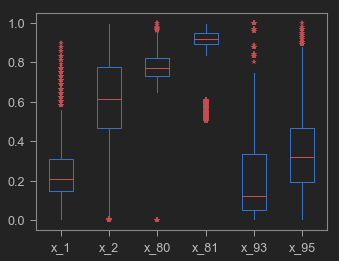

In [141]:
continous_var = ["x_1","x_2","x_80",'x_81','x_93','x_95']
numeric_var[continous_var].boxplot(sym="r*",grid=False)

In [142]:
def impute_outliers(col):
    desc = numeric_var[col].describe()
    upper = desc["75%"]+1.5*(desc["75%"]-desc["25%"])
    lower = desc["25%"]-1.5*(desc["75%"]-desc["25%"])
    outliers = numeric_var[col][(numeric_var[col]>upper)|(numeric_var[col]<lower)]
    need_values = [desc["mean"],desc["50%"],desc['25%'],desc['75%']]
    impute_values = [need_values[i] for i in [np.random.randint(4) for _ in range(len(outliers))]]
    numeric_var[col] = pd.Series(impute_values,index=outliers.index).combine_first(numeric_var[col])

for col in continous_var:
    impute_outliers(col)

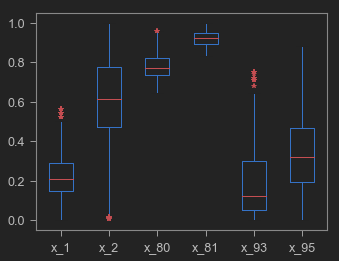

In [143]:
continous_var = ["x_1","x_2","x_80",'x_81','x_93','x_95']
numeric_var[continous_var].boxplot(sym="r*",grid=False)

#### discrete var outliers--drop

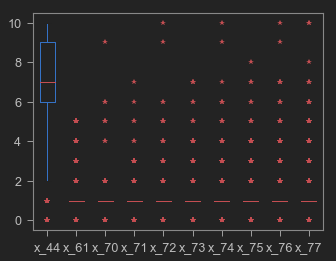

In [144]:
find_outlier_var = ['x_44']+['x_61']+['x_7%s' % i for i in range(8)]
numeric_var[find_outlier_var].boxplot(sym="r*",grid=False)

In [145]:
def search_outlier(col):
    desc = numeric_var[col].describe()
    upper = desc["75%"]+1.5*(desc["75%"]-desc["25%"])
    lower = desc["25%"]-1.5*(desc["75%"]-desc["25%"])
#     print("mean:",desc["mean"])
#     print("median:",desc["50%"])
#     print("lower:",lower)
#     print("upper:",upper)
#     outliers = numeric_var[col][(numeric_var[col]>upper)|(numeric_var[col]<lower)]
    outliers = numeric_var[col][numeric_var[col]<lower]
#     print("%s has %i outliers" % (col,len(outliers)))
#     print("---------------------------")
    return outliers

In [146]:
outliers_df = pd.DataFrame()
for col in find_outlier_var:
    outliers = search_outlier(col)
    outliers_df = pd.concat([outliers_df,outliers],axis=1)

In [147]:
train_xy.drop(outliers_df.index,axis=0,inplace=True)

train_xy.drop(["x_%s" % i for i in range(70,78)],axis=1,inplace=True)

## compute threshold of numeric variables:x_1-x_95
### by var threshold

In [148]:
numeric_var = train_xy.loc[:,"x_1":"x_95"]
numeric_var_desc = numeric_var.describe().T[['std','mean']].assign(rate_of_std=lambda x: x["std"]/x["mean"])
cond = numeric_var_desc["std"]<0.01
col_drop = numeric_var_desc[cond]
# for col in col_drop.index:
#     print(train_xy[col].value_counts(dropna=False))
col_drop

,std,mean,rate_of_std
x_6,0.0,0.0,NaN
x_12,0.0,0.0,NaN
x_18,0.0,0.0,NaN
x_23,0.0,0.0,NaN
x_28,0.0,0.0,NaN
x_34,0.0,0.0,NaN


In [149]:
cols = col_drop.index.tolist()
for i in range(len(cols)-1):
    for j in range(i+1,len(cols)):
        if numeric_var[cols[i]].equals(numeric_var[cols[j]]):
            print(cols[i],"==",cols[j])

x_6 == x_18
x_6 == x_28
x_12 == x_23
x_12 == x_34
x_18 == x_28
x_23 == x_34


In [150]:
 # x_23,x_34权重为0,x_18,x_28权重接近0.2，吊车尾;x_6,x_12有一定权重，可能与出现顺序有关,此处保留
train_xy.drop(["x_18","x_28","x_23","x_34"],axis=1,inplace=True)

### by corr threshold

In [151]:
corr = train_xy.corr()
corr.loc[:,:] = np.tril(corr,k=-1)
corr = corr.stack()
pd.DataFrame(corr[(corr>0.94)|(corr<-0.94)],columns=["corr"])

corr
x_5   x_4    0.951938
x_8   x_7    0.948362
x_11  x_10   0.960184
x_14  x_13   0.946623
x_21  x_15   0.957315
x_25  x_15   1.000000
      x_21   0.957315
x_31  x_15   0.957315
      x_21   1.000000
      x_25   0.957315
x_65  x_39   0.963363
x_66  x_39   0.965821
x_148 x_146  0.946187
x_155 x_154  0.988368

In [152]:
# print(train_xy["x_15"].equals(train_xy["x_25"])) 
# print(train_xy["x_21"].equals(train_xy["x_31"]))

In [153]:
train_xy.drop(["x_39","x_146","x_154"],axis=1,inplace=True) #去掉共同高度相关且权重极低的特征

# final step:feature scale and one-hot code
## feature scale

In [154]:
def continous_var_scale(cols,method="mean_std"):
    if method == "min_max":
        train_xy[cols] = train_xy[cols].apply(lambda x:(x-x.mean())/x.std())
    elif method == "mean_std":
        train_xy[cols] = train_xy[cols].apply(lambda x:(x-x.min())/(x.max()-x.min()))
    return train_xy

In [155]:
train_xy = continous_var_scale(continous_var)

## one-hot code

In [156]:
one_hot_var = {
                "x_3":(2,True),
               "x_4":(4,True),
               "x_5":(None,True),
               "x_6":(None,True),
               "x_7":([6],True),
               "x_8":([5],False),
               "x_9":(2,True),
               "x_10":(4,True),
               "x_11":(4,True),
               "x_12":(None,True),
               "x_13":([10],False), 
               "x_14":([7.5],False),
               "x_15":(2,True),
               "x_16":(4,True),
               "x_17":(4,True),
#                "x_18":(None,True),
               "x_19":(13,True),
               "x_20":([-0.5,2.5,5.5,8.5],True),
               "x_21":(2,True),
               "x_22":([5.5],False),
#                "x_23":(None,True),
               "x_24":([20],False),
               "x_25":(2,True),
               "x_26":(6,True),
               "x_27":(4,True),
#                "x_28":(None,True),
               "x_29":(16,True),
               "x_30":([10],False),
               "x_31":(2,True),
               "x_32":(7,True),
               "x_33":(5,True),
#                "x_34":(None,True),
               "x_35":([20],False),
               "x_36":({},False),#改作连续var
               "x_37":(4,True),
               "x_38":({},False),#改作连续var
#                "x_39":(None,True),
               "x_40":(None,True),
               "x_41":(None,True),
               "x_42":(None,True),
               "x_43":(None,True),
               "x_44":([4],True),
               "x_45":(None,True),
               "x_46":(8,True),
               "x_47":(None,True),
               "x_48":(None,True),
               "x_49":((0,2),True)
              }
one_hot_var.update(dict.fromkeys(["x_%s" % i for i in range(50,70)],(None,True))) 
one_hot_var.update(
                    {
#                         "x_70":(6,True),
#                         "x_71":(None,True),
#                         "x_72":(6,True),
#                         "x_73":(None,True),
#                         "x_74":(6,True),
#                         "x_75":(None,True),
#                         "x_76":(6,True),
#                         "x_77":(None,True),
                        "x_70to77":((7.5,8.5),False),
#                         "x_70to77":({},False),
                        "x_78":({},False),#改作连续var
                        "x_79":({},False),#改作连续var
                        "x_80":([0,0.68,0.9,1],False),
                        "x_81":([-0.5,0.75,0.96],False),
                        "x_82":(None,True),
                        "x_83":(None,True),
                        "x_84":(7,True),
                        "x_85":(None,True),
                        "x_86":(None,True),
                        "x_87":(4,True),
                        "x_88":(10,True),
                        "x_89":(2,True),
                        "x_90":({},False),#改作连续var
                        "x_91":({},False),#改作连续var
                        "x_141":([0,1,3,5],True),
                        "x_147":([1.5,4],True),
                        "x_153":((0.5,1),True),
                        "x_155":({},False),#改作连续var
                    }
                )
one_hot_var.update(dict.fromkeys(train_xy.loc[:,"x_96":"x_157"].columns.drop(["x_141","x_147","x_153","x_155"]),(None,True)))

In [157]:
def one_hot_code(col,bound=None,drop=True,train_xy=train_xy):
#     train_xy_cp = train_xy.copy()
    if bound is None:
        dummy = pd.get_dummies(train_xy[col],prefix=col,dummy_na=True)
    
    elif isinstance(bound,int):
        train_xy.loc[(train_xy[col]>=bound),col] = bound
        dummy = pd.get_dummies(train_xy[col],prefix=col,dummy_na=True)
    
    elif isinstance(bound,list):
        col_cut = pd.cut(train_xy[col],bins=[float("-inf")]+bound+[float('inf')],labels=False)
        dummy = pd.get_dummies(col_cut,prefix=col,dummy_na=True)
    
    elif isinstance(bound,tuple):
        col_cut = pd.cut(train_xy[col],bins=list(bound),labels=False)
        dummy = pd.get_dummies(col_cut,prefix=col,dummy_na=True)
    
    elif isinstance(bound,dict):
        dummy = None
    
    if drop:
        return dummy
    else:
        col_dummy = pd.concat([train_xy[col].fillna(-1),dummy],axis=1)
        return col_dummy

In [158]:
train_xy_clean = train_xy[["x_1","x_2","x_93","x_95","y"]].apply(lambda x: x.fillna(x.mean()))
for k,v in one_hot_var.items():
    dummy_df = one_hot_code(k,bound=v[0],drop=v[1])
    train_xy_clean = pd.concat([dummy_df,train_xy_clean],axis=1)

In [159]:
from sklearn.utils import shuffle
shuffle(train_xy_clean).to_csv("./train_xy_clean.csv")

In [160]:
import re
from functools import reduce
regex = re.compile(r"^x_\d{1,3}")
train_data_dummies = pd.Series(reduce(lambda x,y:x+y,train_xy_clean.columns.str.findall(regex))).value_counts()#.plot(kind="bar")
train_data_dummies.to_excel("./train_data_dummies.xlsx")

In [161]:
train_data_nolabel_dummies = pd.read_excel("./train_data_nolabel_dummies.xlsx")
test_data_dummies = pd.read_excel("./test_data_dummies.xlsx")

In [162]:
dummies = pd.concat([train_data_dummies,train_data_nolabel_dummies,test_data_dummies],axis=1)
dummies.columns = ["train_data","train_data_nolabel","test_data"]
dummies[(dummies.iloc[:,0]!=dummies.iloc[:,1])|(dummies.iloc[:,1]!=dummies.iloc[:,2])]

,train_data,train_data_nolabel,test_data
